In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'retina'
from setup import *

Extracting models from ../Models/gen_neuro.tar.gz to ../Models/gen_neuro... 
Extracting data from ../Data/generated_neuro_MSR.tar.gz to ../Data/generated_neuro_MSR.h5... 


# Usefull functions

# Figures

## Emission Distributions

In [3]:
i = 3
artr = ALL_ARTRs[i]
print(artr)

temp = artr[1]
ANGLEs, DTs, DISTs = load_behavior(bDATAPATH, temp)
bangle, bdt, bdist, bstate = load_genbehavior(bGENPATH, temp)
nangle, ndt, ndist, nstate = load_genneuro(nGENPATH, *artr)

[11 22]


In [8]:
def hist(X, bins=None):
    h_x, b_x = np.histogram(X, bins=bins, density=True)
    #print(h_x.sum())
    h_x[h_x==0] = np.nan
    return h_x, (b_x[1:] + b_x[:-1])/2

nbins = 75

h_ANGLES, b_ANGLES = hist(np.concatenate(ANGLEs), bins=np.linspace(-100, +100, 10*nbins))
h_bangles, b_bangles = hist(bangle, bins=np.linspace(-100, +100, nbins))
h_nangles, b_nangles = hist(np.concatenate(nangle), bins=np.linspace(-100, +100, nbins))

h_DT, b_DT = hist(np.concatenate(DTs), bins=np.linspace(0, 20, 10*nbins))
h_bdt, b_bdt = hist(bdt, bins=np.linspace(0, 20, nbins))
h_ndt, b_ndt = hist(np.concatenate(ndt), bins=np.linspace(0, 20, nbins))

h_DIST, b_DIST = hist(np.concatenate(DISTs), bins=np.linspace(0, 10, 10*nbins))
h_bdist, b_bdist = hist(bdist, bins=np.linspace(0, 10, nbins))
h_ndist, b_ndist = hist(np.concatenate(ndist), bins=np.linspace(0, 10, nbins))

(0.0002, 6.0)

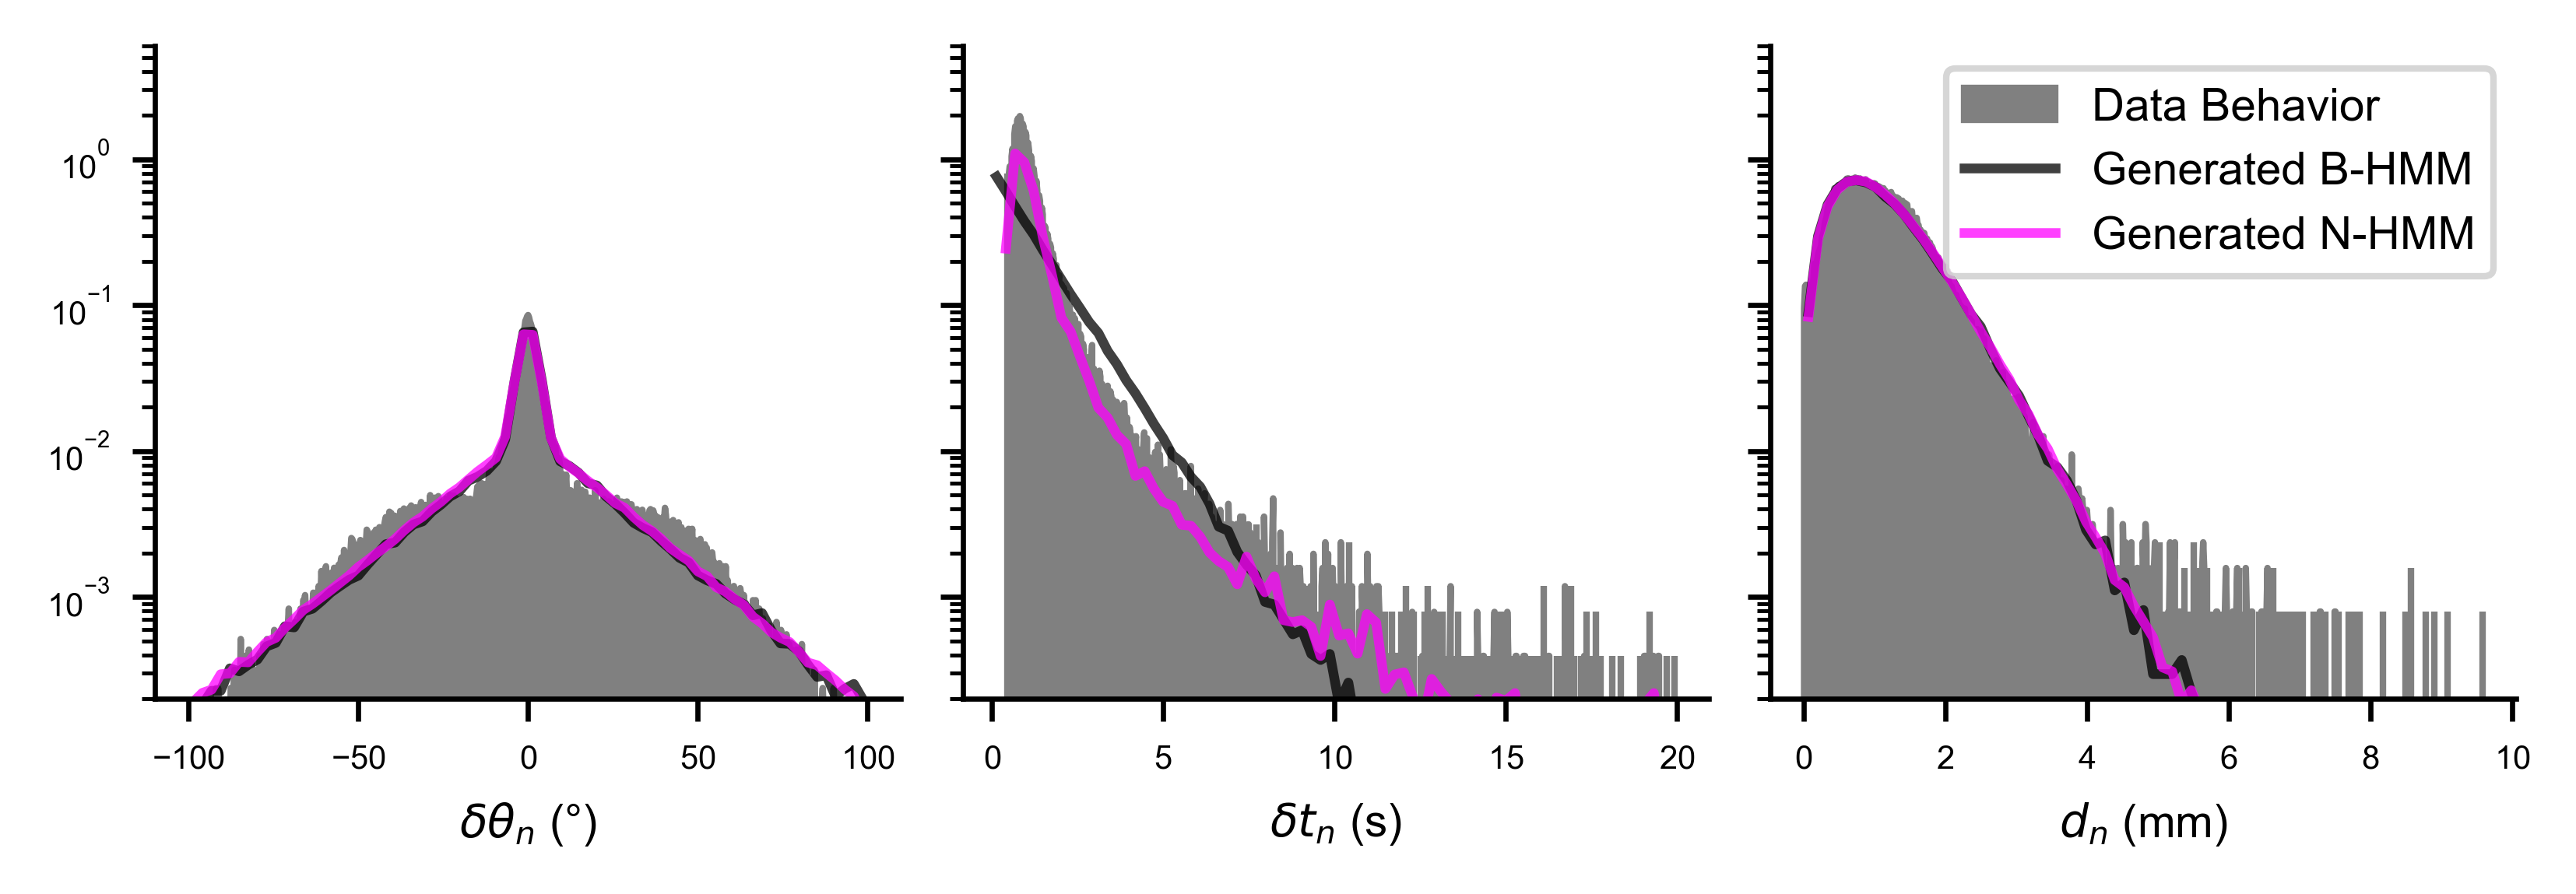

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(3*1.8,1.8), sharey=True)
for ax in axs:
    ax.set_yscale("log")
#ax.set_ylim(1.e-4, 10.e0)

data_color = "grey"
bgen_color = "k"
ngen_color = "magenta"
gen_alpha = 0.75
border = 1
norder = 2
ORDER = 0

ax = axs[0]
ax.fill_between(b_ANGLES, h_ANGLES, zorder=ORDER, color=data_color)
ax.plot(b_bangles, h_bangles, color=bgen_color, alpha=gen_alpha, zorder=border)
ax.plot(b_nangles, h_nangles, color=ngen_color, alpha=gen_alpha, zorder=norder)
ax.set_xlabel(r"$\delta\theta_n$ (°)")
#ax.set_ylabel("Density")

ax = axs[1]
ax.fill_between(b_DT, h_DT, zorder=ORDER, color=data_color)
ax.plot(b_bdt, h_bdt, color=bgen_color, alpha=gen_alpha, zorder=border)
ax.plot(b_ndt, h_ndt, color=ngen_color, alpha=gen_alpha, zorder=norder)
ax.set_xlabel(r"$\delta t_n$ (s)")

ax = axs[2]
ax.fill_between(b_DIST, h_DIST, zorder=ORDER, color=data_color, label="Data Behavior")
ax.plot(b_bdist, h_bdist, color=bgen_color, alpha=gen_alpha, label="Generated B-HMM", zorder=border)
ax.plot(b_ndist, h_ndist, color=ngen_color, alpha=gen_alpha, label="Generated N-HMM", zorder=norder)
ax.set_xlabel(r"$d_n$ (mm)")

ax.legend()
ax.set_ylim(2.e-4, 6.e0)


#fig.savefig("panels/Fig6/BfromB_and_BfromN_hists.svg")

## MSR

### Compute the MSR

In [10]:
from utils.MeanSquaredReorientation import *

In [11]:
qs = np.arange(0,16)

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  5.17it/s]


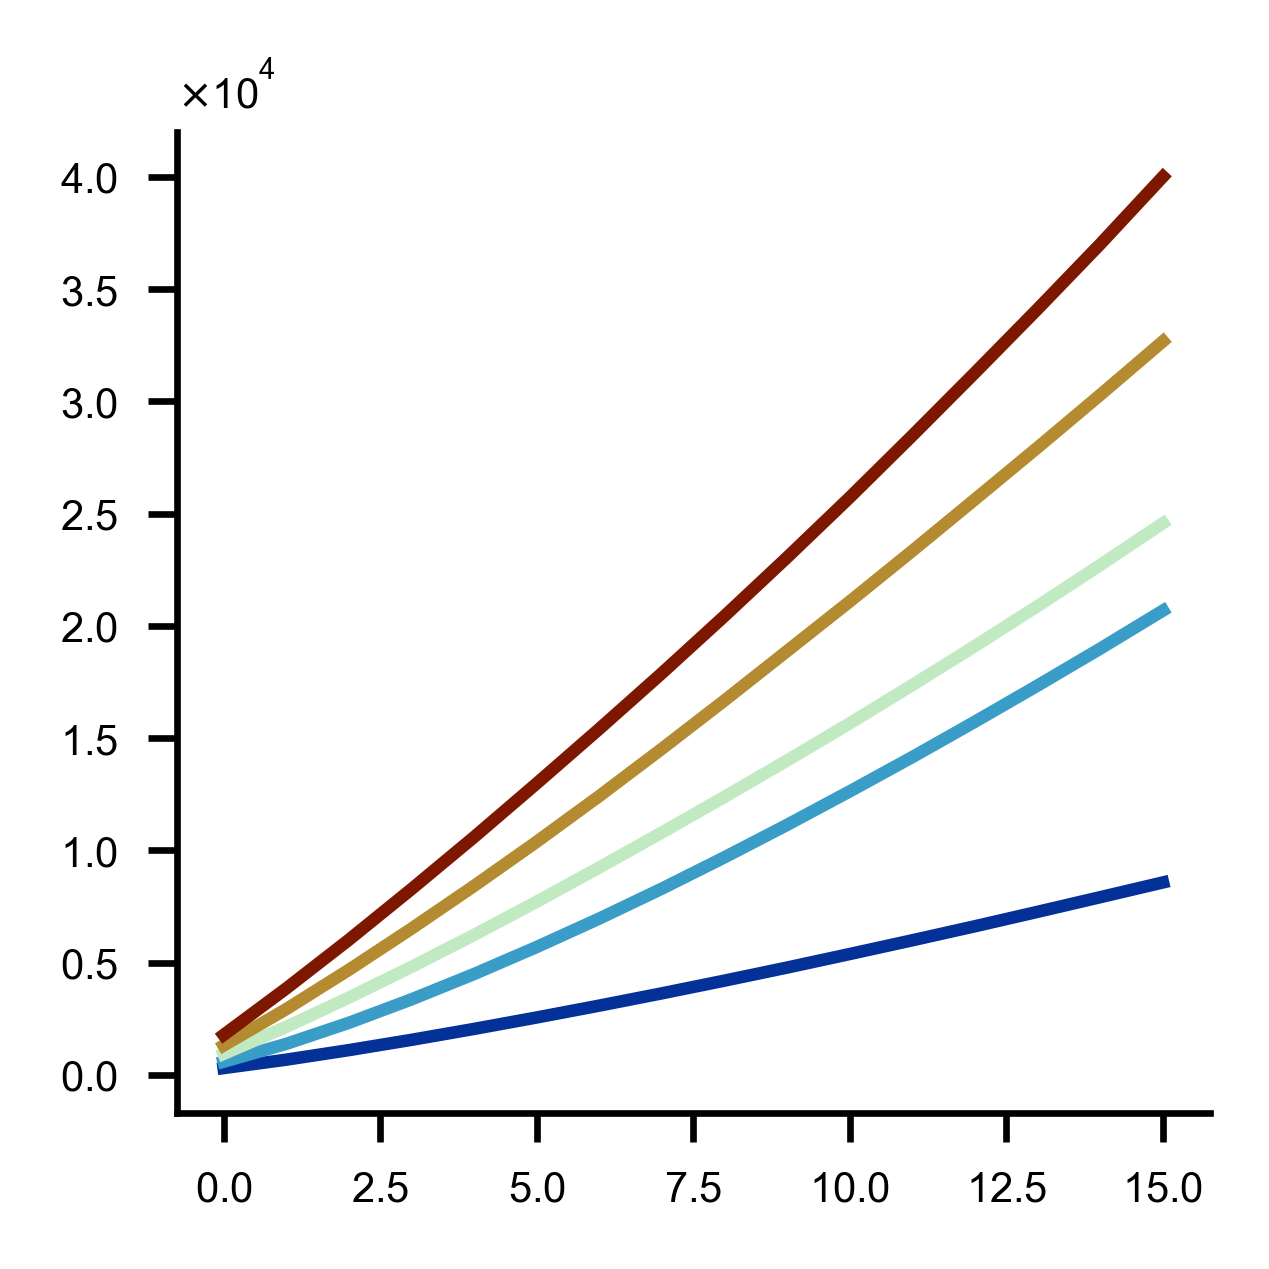

In [13]:
MSR_data = np.empty((len(TEMPS), len(qs))) # ( temp , q)
for t, temp in enumerate(TEMPS):
    DTHETAS = load_sequences(bDATAPATH, temp) # behavior data
    MSR_data[t, :] = MSR(DTHETAS, qs)

fig, ax = plt.subplots()
for t, temp in enumerate(TEMPS):
    ax.plot(qs, MSR_data[t], color=TEMPS_COLS[temp])

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  4.74it/s]


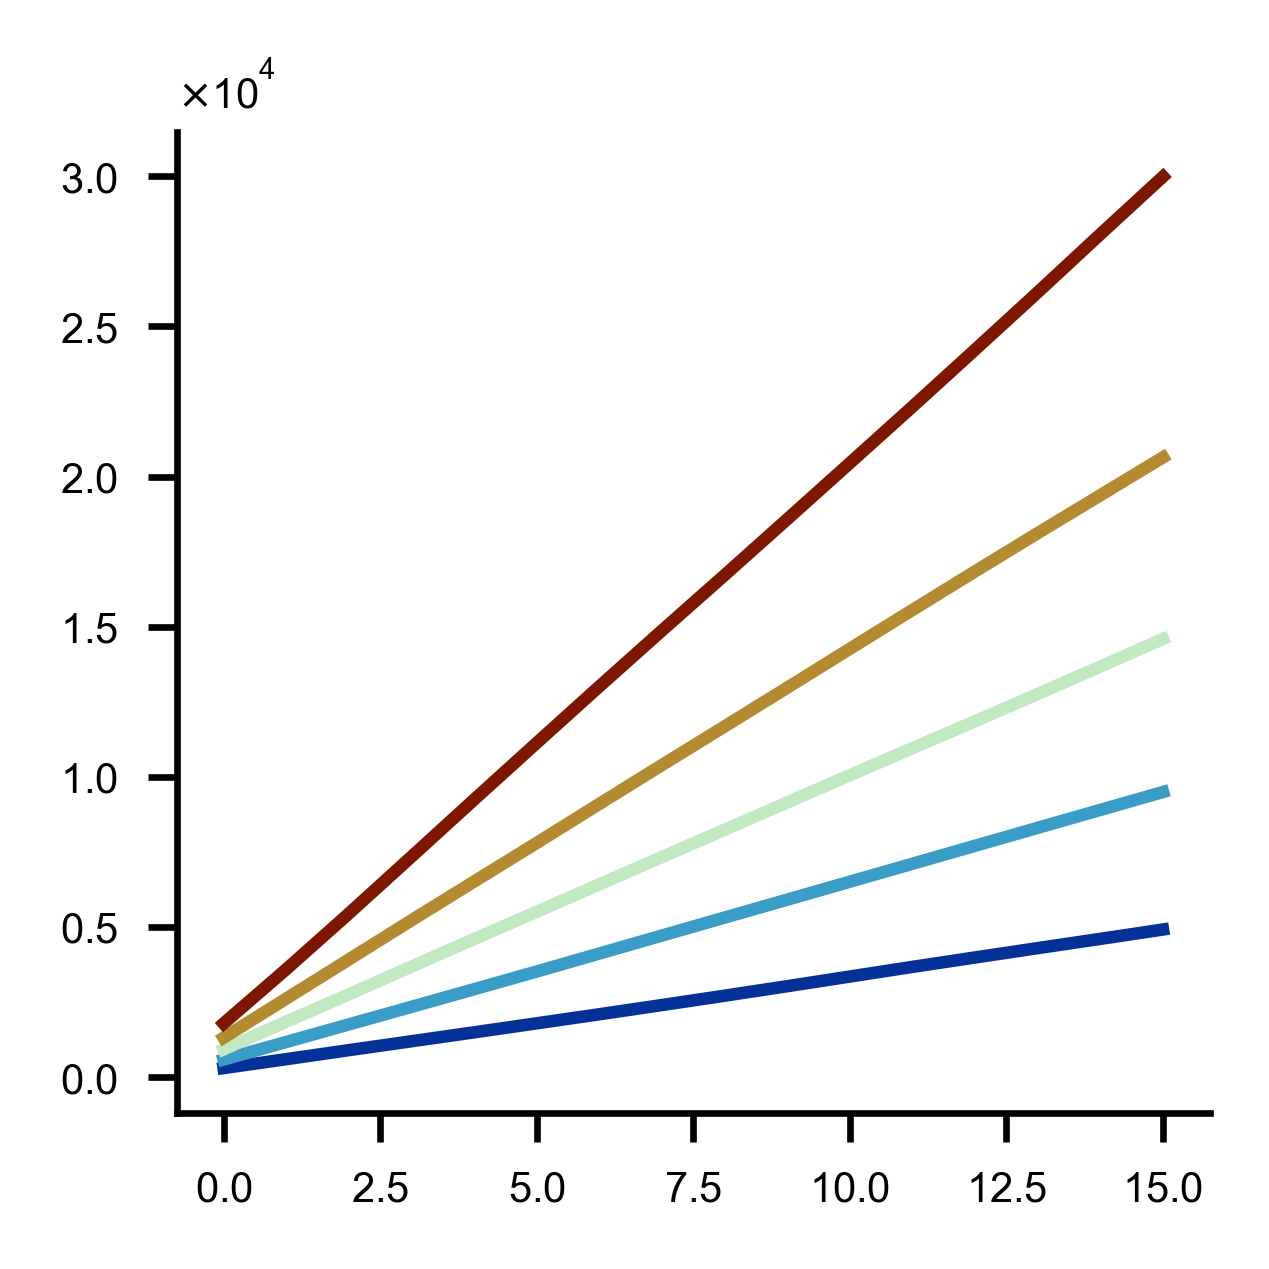

In [15]:
#MSR_shuffled = np.empty((len(TEMPS), 2, len(qs))) # ( temp , [mean std] , q)
MSR_shuffled = np.empty((len(TEMPS), len(qs))) # ( temp , q)
for t, temp in enumerate(TEMPS):
    DTHETAS = load_sequences(bDATAPATH, temp) # behavior data
    DTHETAS_rand = randomize_sequences(DTHETAS) # shuffled data
    MSR_shuffled[t,:] = MSR(DTHETAS_rand, qs)
    #m = MSRs(DTHETAS_rand, qs)
    #MSR_shuffled[t, :, :] = [
    #    np.nanmean(m,axis=0),
    #    np.nanstd(m,axis=0)/np.sqrt(m.shape[0]),
    #]

fig, ax = plt.subplots()
for t, temp in enumerate(TEMPS):
    ax.plot(qs, MSR_shuffled[t], color=TEMPS_COLS[temp])
    #ax.fill_between(
    #    qs,
    #    MSR_shuffled[t, 0] - MSR_shuffled[t, 1],
    #    MSR_shuffled[t, 0] + MSR_shuffled[t, 1],
    #    color=TEMPS_COLS[temp],
    #    alpha=0.5
    #)

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 41.27it/s]


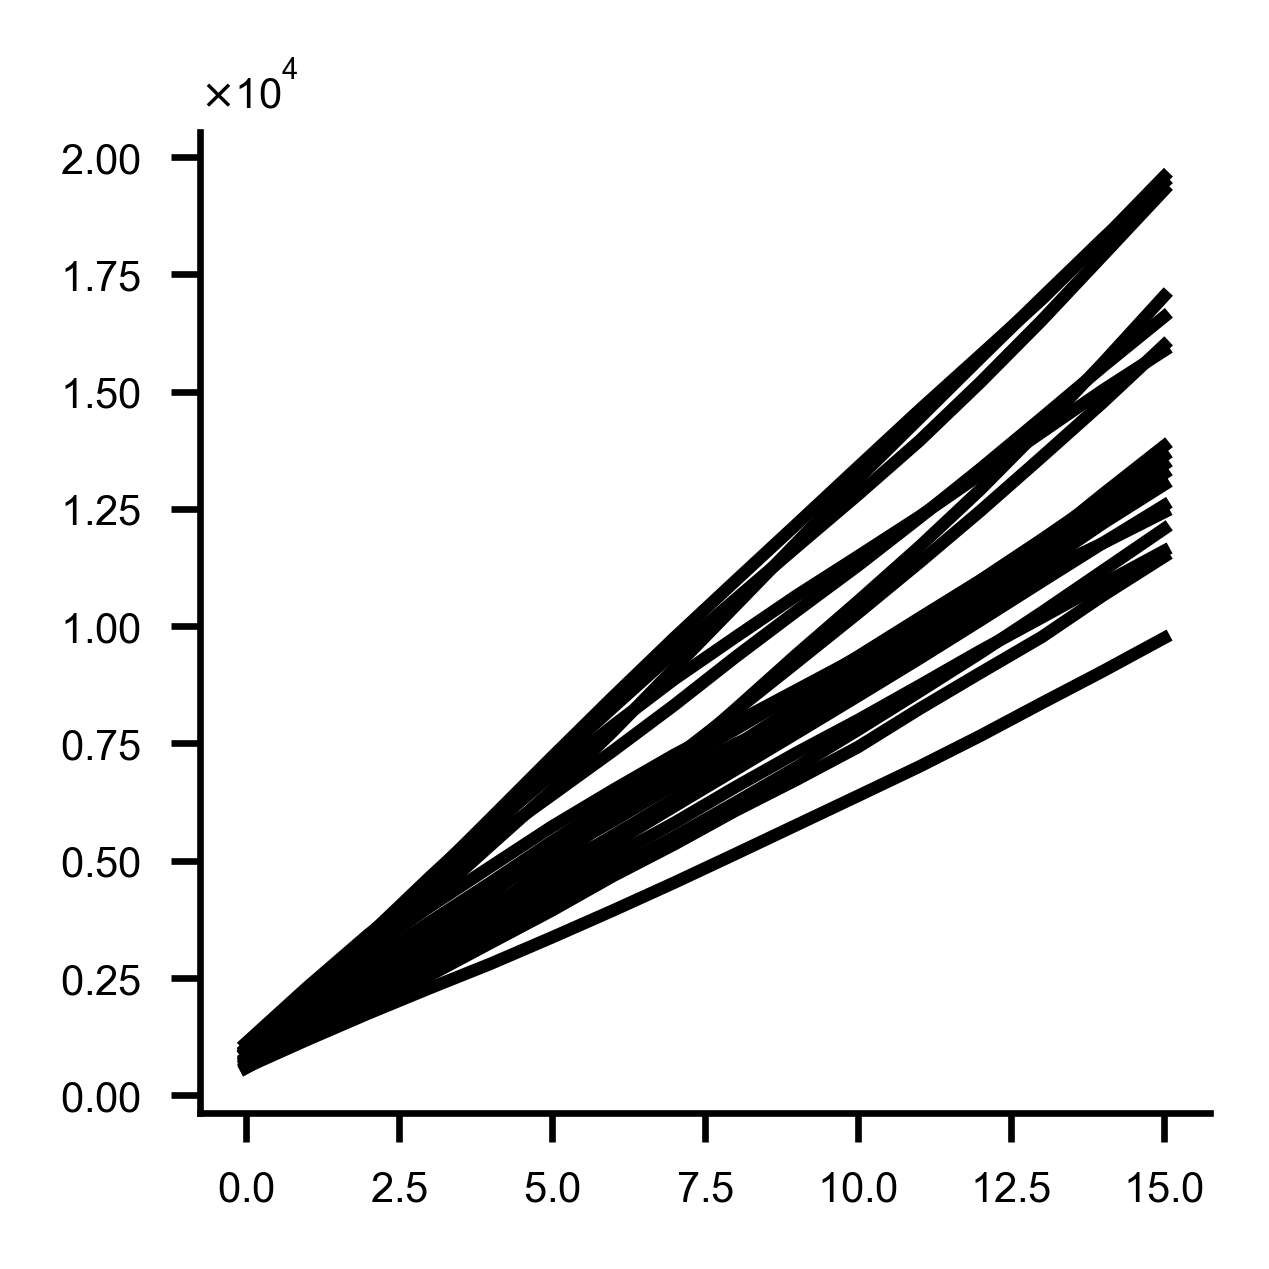

In [16]:
MSR_long = np.empty((18, len(qs)))
for fish in range(18):
    ldtheta = loadlong_sequences(blDATAPATH, fish)
    MSR_long[fish, :] = MSR(ldtheta, qs)

fig, ax = plt.subplots()
for fish in range(18):
    ax.plot(qs, MSR_long[fish],color="k")

In [140]:
len(ALL_ARTRs)

32

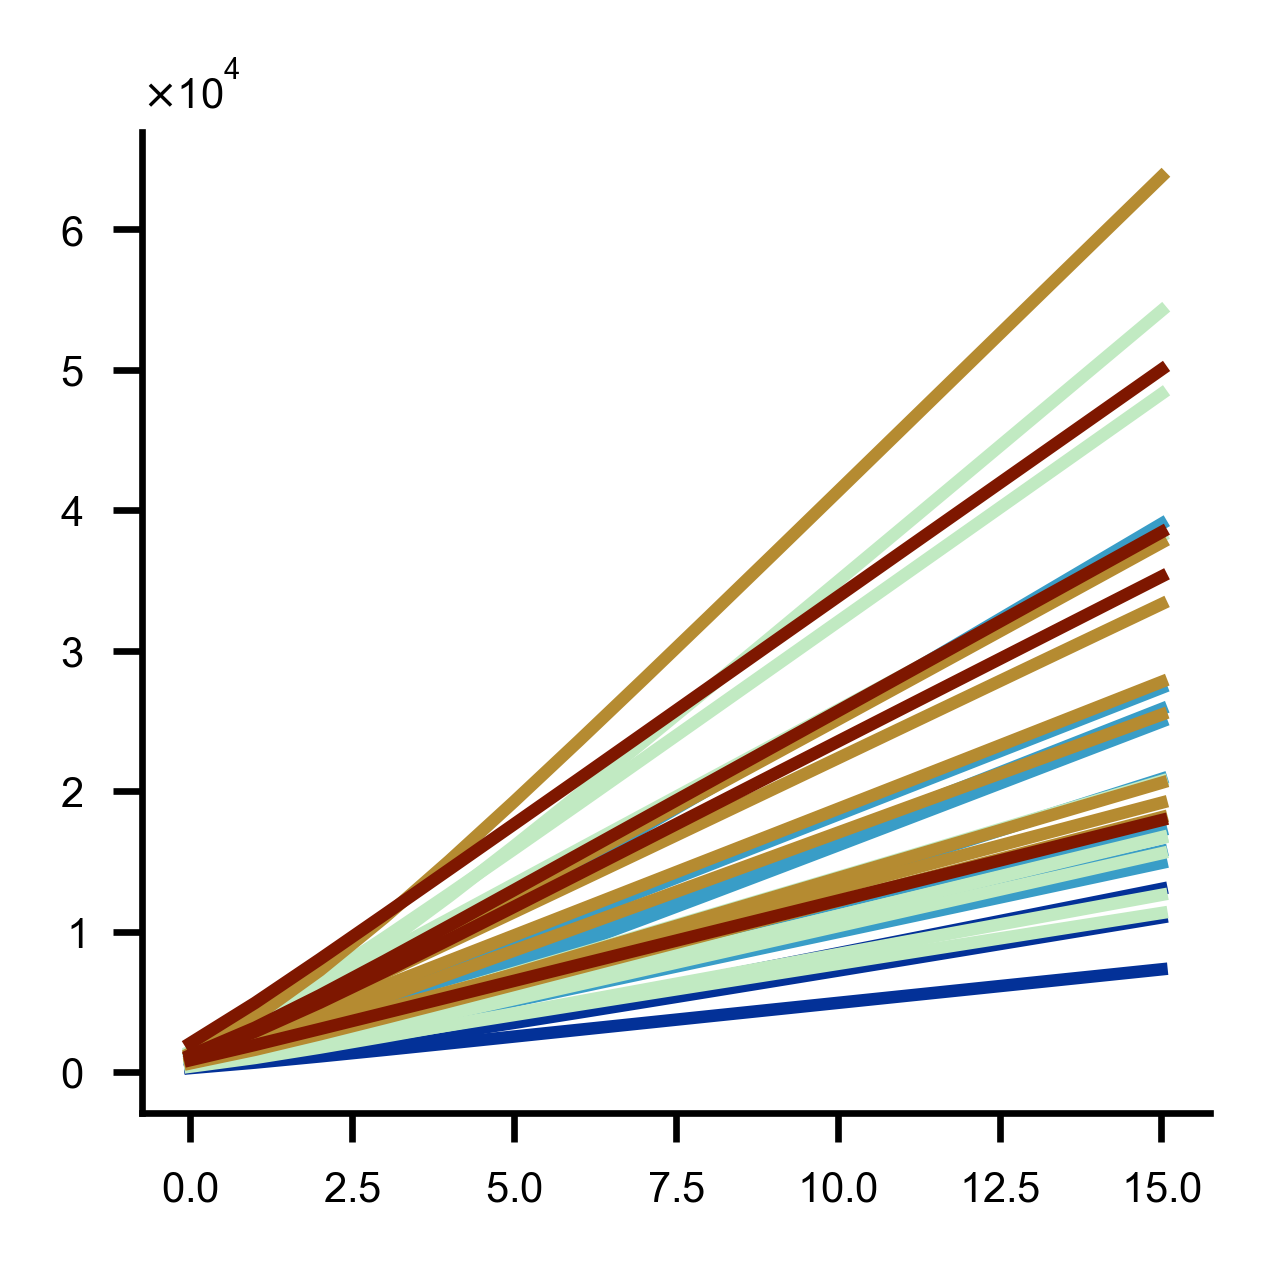

In [19]:
MSR_Ngen = [] # (temp) x (fish) x ([mean std] , q)
for t, temp in enumerate(TEMPS):
    msr_temp = [] # N-HMM generated
    for artr in ALL_ARTRs[ALL_ARTRs[:,1] == temp]:
        msr_temp.append(load_neuro_MSR(nMSRPATH, *artr))
    MSR_Ngen.append(msr_temp)

fig, ax = plt.subplots()
for t, temp in enumerate(TEMPS):
    for f in range(len(MSR_Ngen[t])):
        ax.plot(qs, MSR_Ngen[t][f], color=TEMPS_COLS[temp])

In [12]:
MSR_all = np.empty((len(TEMPS), 6, 2, len(qs))) # ( temp , [data shuffled B-HMM N-HMM] , [mean sem] , q )

for t, temp in enumerate(TEMPS):
    DTHETAS = load_sequences(bDATAPATH, temp) # behavior data
    bdtheta,_,_,_ = load_genbehavior(bGENPATH, temp) # generated behavior
    bdtheta = np.array_split(
        bdtheta,
        len(bdtheta) / np.mean([len(a) for a in DTHETAS]),
    )
    DTHETAS_rand = randomize_sequences(DTHETAS) # randomized behavior data
    #bdtheta_rand = randomize_sequences(bdtheta) # randomized generated data

    ndtheta = [] # neuro generated
    for artr in ALL_ARTRs[ALL_ARTRs[:,1] == temp]:
        [ndtheta.append(a) for a in load_genneuro(nGENPATH, *artr)[0]]
    #ndtheta_rand = randomize_sequences(ndtheta)

    sets = [DTHETAS, DTHETAS_rand, bdtheta, ndtheta]
    for i, set in enumerate(sets):
        m = MSRs(set, qs)
        MSR_all[t, i, :] = [
            np.nanmean(m,axis=0),
            np.nanstd(m,axis=0)/np.sqrt(m.shape[0]),
        ]

Computing MSRs:  17%|██████████████████▉                                                                                              | 89/532 [00:00<00:00, 886.74it/s]/opt/miniconda3/envs/ZebrafishHMM2024/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/ZebrafishHMM2024/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Computing MSRs: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [01:24<00:00,  4.76it/s]


### MSR line plot

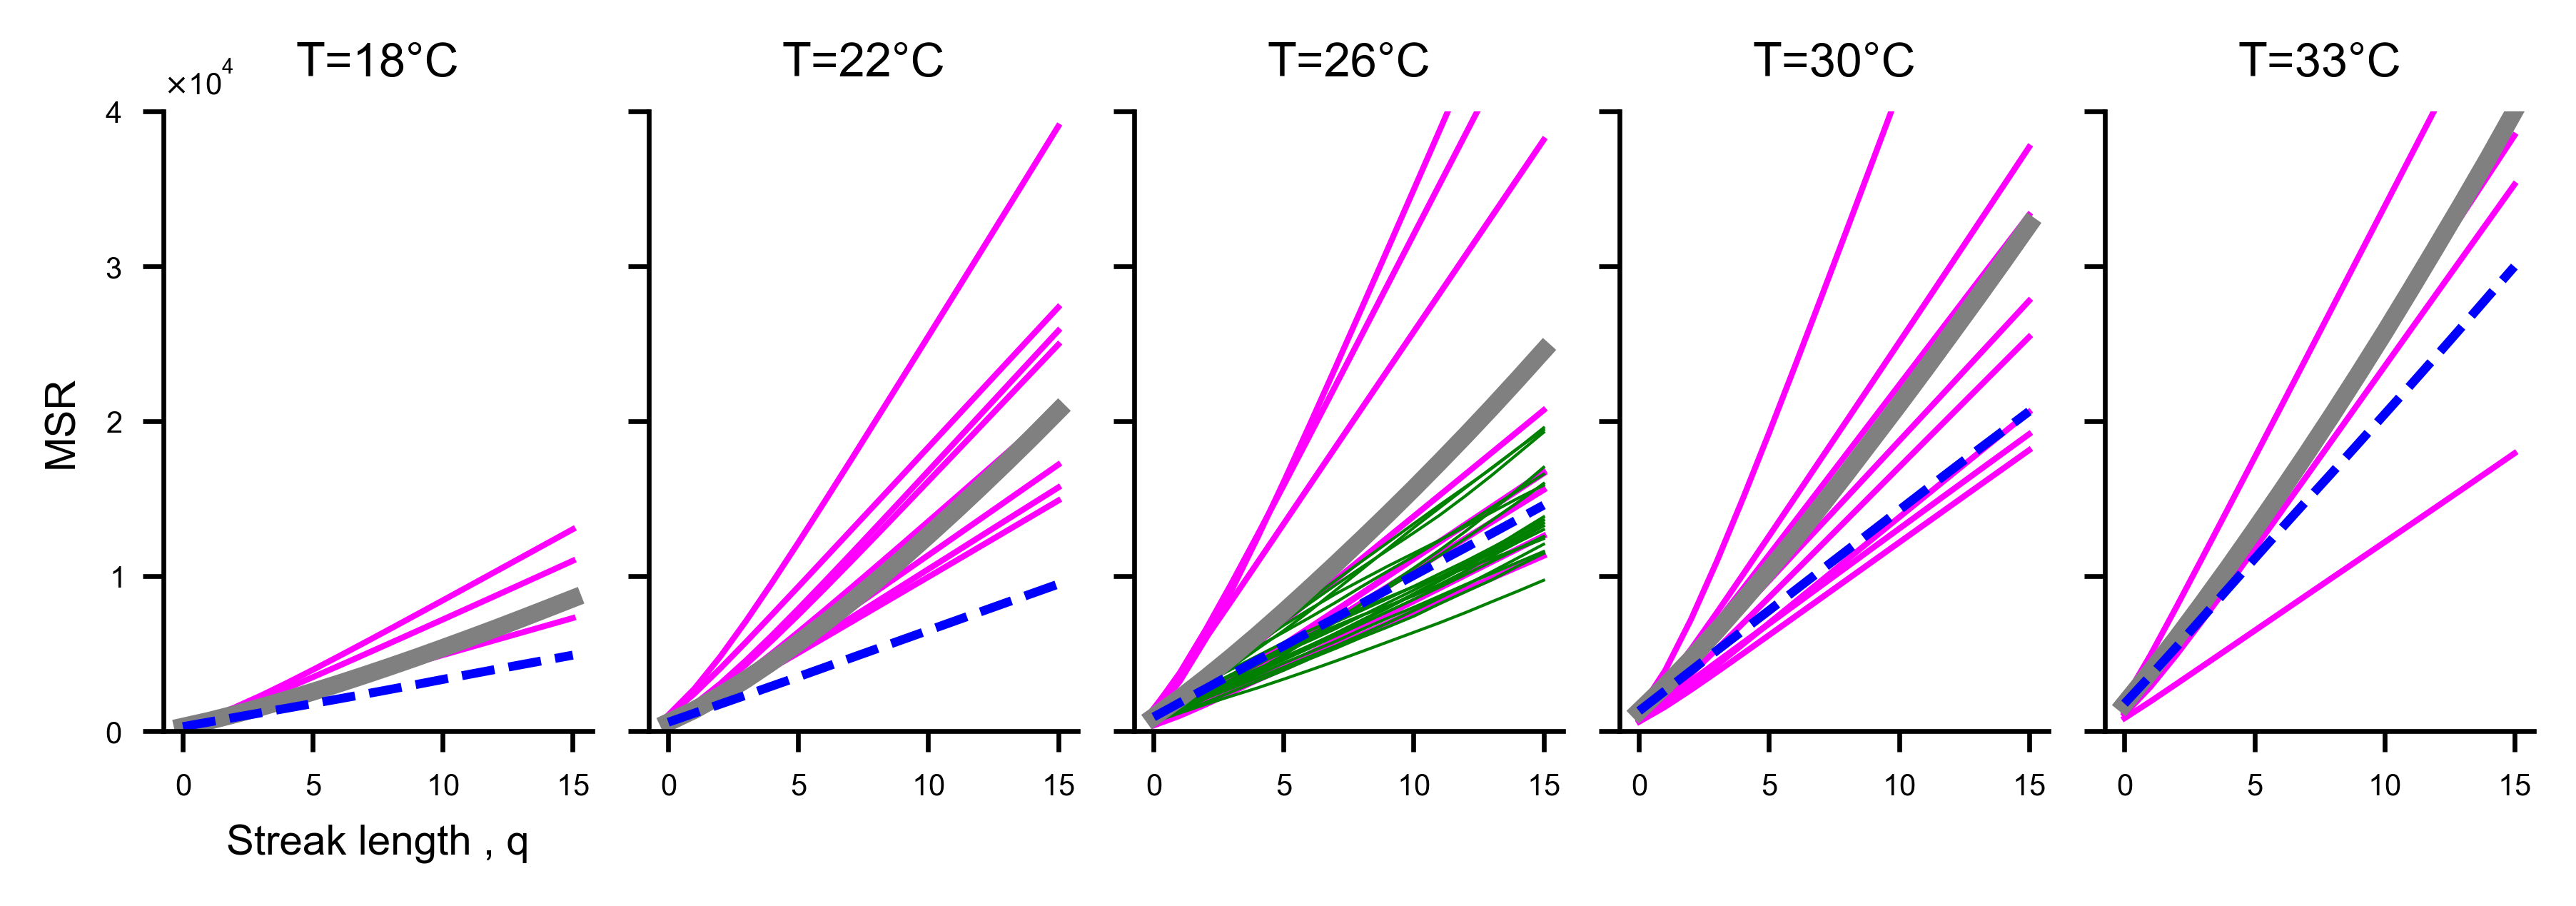

In [20]:
fig_lines, axs = plt.subplots(
    ncols=len(TEMPS), 
    figsize=(len(TEMPS)*1.18, 2), 
    sharex=True, sharey=True,
)

for t, temp in enumerate(TEMPS):
    ax =axs[t]
    ax.set_title(f"T={temp}°C")
    
    # long trajectories
    if temp == 26:
        for f in range(18):
            ax.plot(qs, MSR_long[f], color="green", linewidth=0.5)

    # data
    ax.plot(qs, MSR_data[t], color="grey", linewidth=3)

    # shuffled
    ax.plot(qs, MSR_shuffled[t], color="blue", linestyle="--")

    # neuro
    for f in range(len(MSR_Ngen[t])):
        ax.plot(qs, MSR_Ngen[t][f], color="magenta", zorder=0, linewidth=1)


ax = axs[0]
ax.set_ylim(0, MSR_data.max())
ax.set_xticks([0,5,10,15])
ax.set_xlabel("Streak length , q")
ax.set_ylabel("MSR")
ax.set_yticks(np.array([0,1,2,3,4])*1.e4);

#fig_lines.savefig("panels/Fig6/MSR_lines.svg")

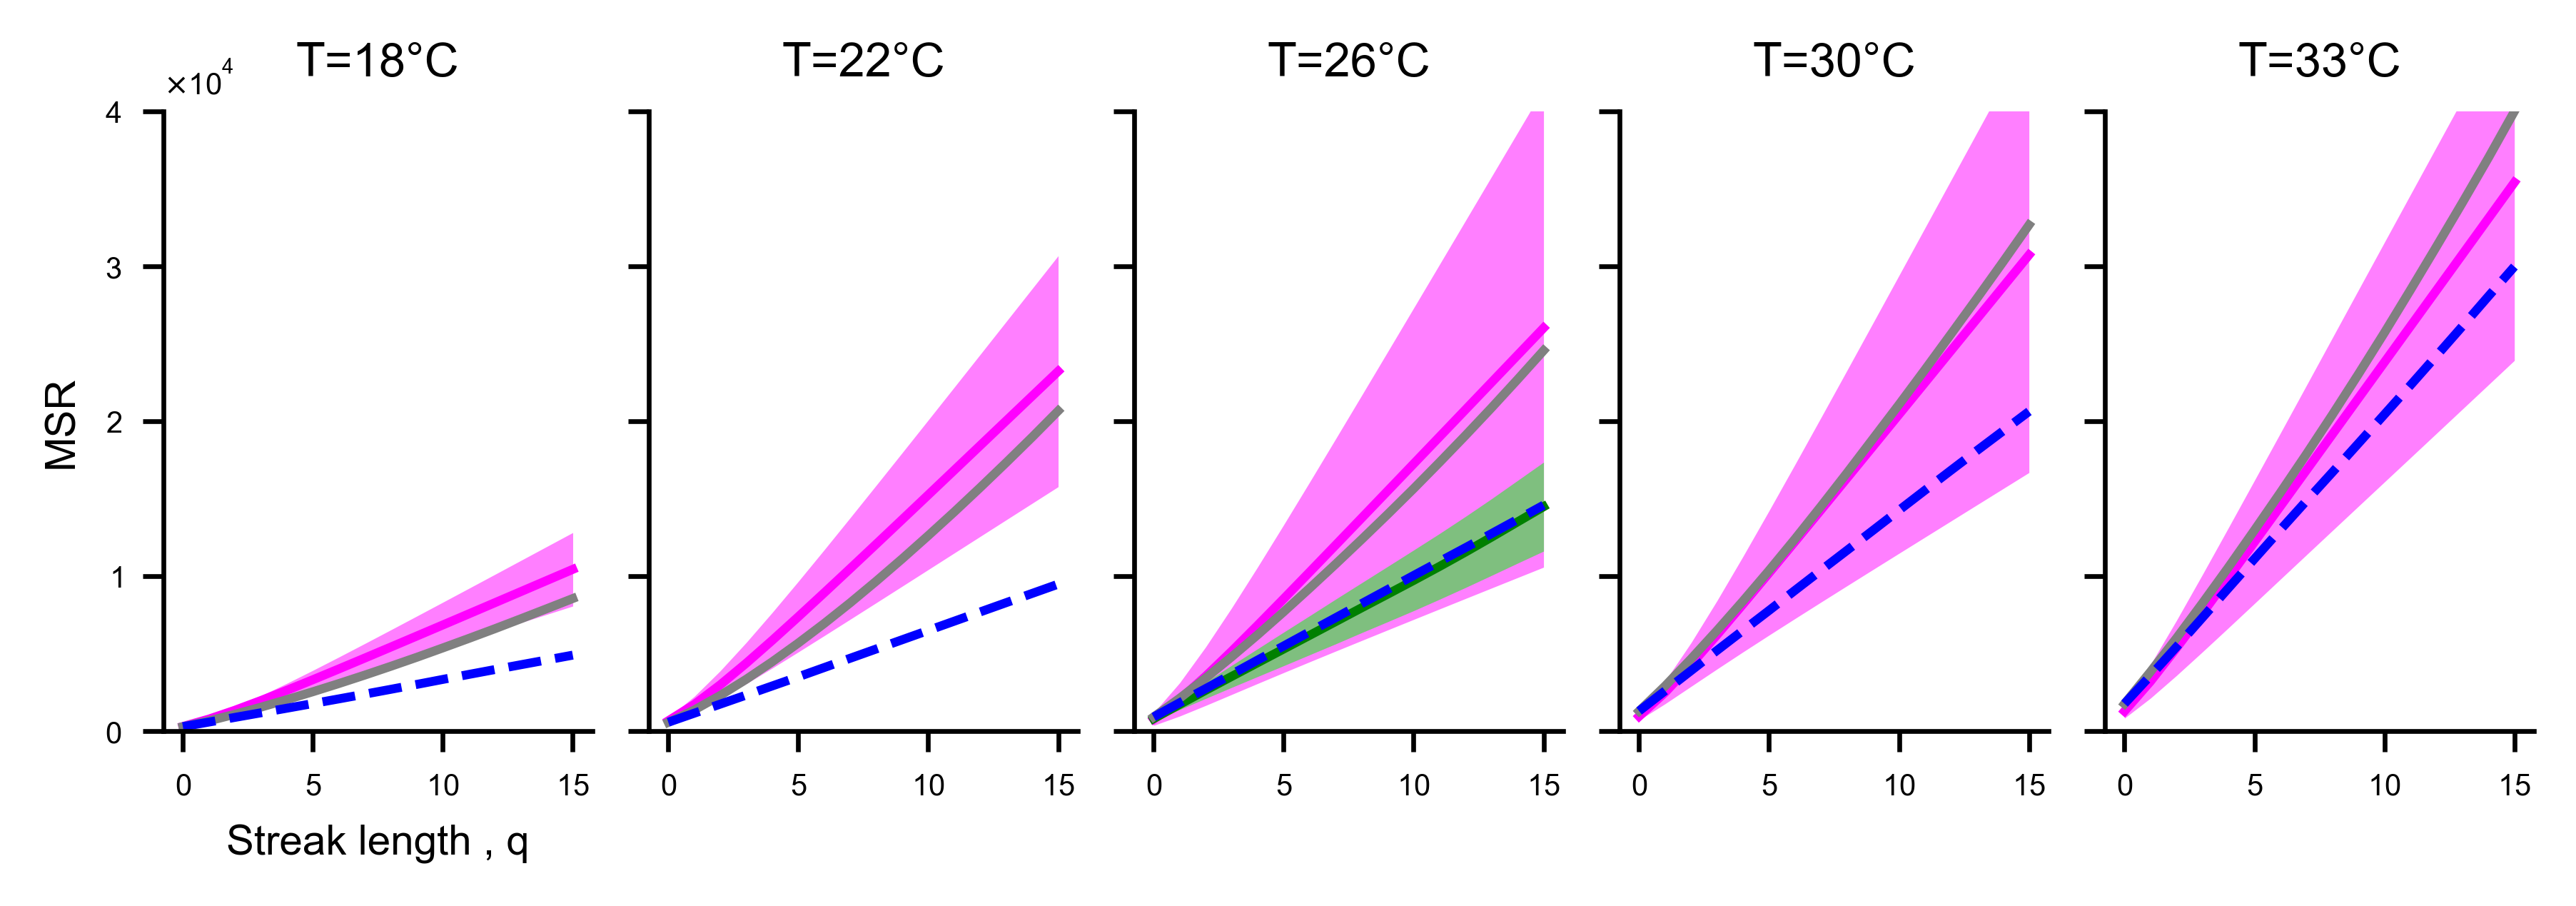

In [21]:
fig_fill, axs = plt.subplots(
    ncols=len(TEMPS), 
    figsize=(len(TEMPS)*1.18, 2), 
    sharex=True, sharey=True,
)

for t, temp in enumerate(TEMPS):
    
    ax =axs[t]
    ax.set_title(f"T={temp}°C")

    # neuro
    m = np.mean(MSR_Ngen[t], axis=0)
    s = np.std(MSR_Ngen[t], axis=0)
    ax.plot(qs, m, color="magenta")
    ax.fill_between(qs, m-s, m+s, color="#ff7fff", linewidth=0)
    
    # long trajectories
    if temp == 26:
        m = MSR_long.mean(axis=0)
        s = MSR_long.std(axis=0)
        ax.plot(qs, m, color="green")
        ax.fill_between(qs, m-s, m+s, color="#7fbf7f", linewidth=0)

    # data
    ax.plot(qs, MSR_data[t], color="grey")

    # shuffled
    ax.plot(qs, MSR_shuffled[t], color="blue", linestyle="--")


ax = axs[0]
ax.set_ylim(0, MSR_data.max())
ax.set_xticks([0,5,10,15])
ax.set_xlabel("Streak length , q")
ax.set_ylabel("MSR")
ax.set_yticks(np.array([0,1,2,3,4])*1.e4);

#fig_fill.savefig("panels/Fig6/MSR_fill.svg")

### sMSR bar plot

In [22]:
q = 10

In [23]:
MSR_Ngen_mean = [np.mean([a[q] for a in MSR_Ngen[t]]) for t in range(len(TEMPS))]
MSR_Ngen_std = [np.std([a[q] for a in MSR_Ngen[t]]) for t in range(len(TEMPS))]

In [24]:
MSR_long_mean = np.mean(MSR_long[:,q])
MSR_long_std = np.std(MSR_long[:,q])

Text(0, 0.5, 'MSR')

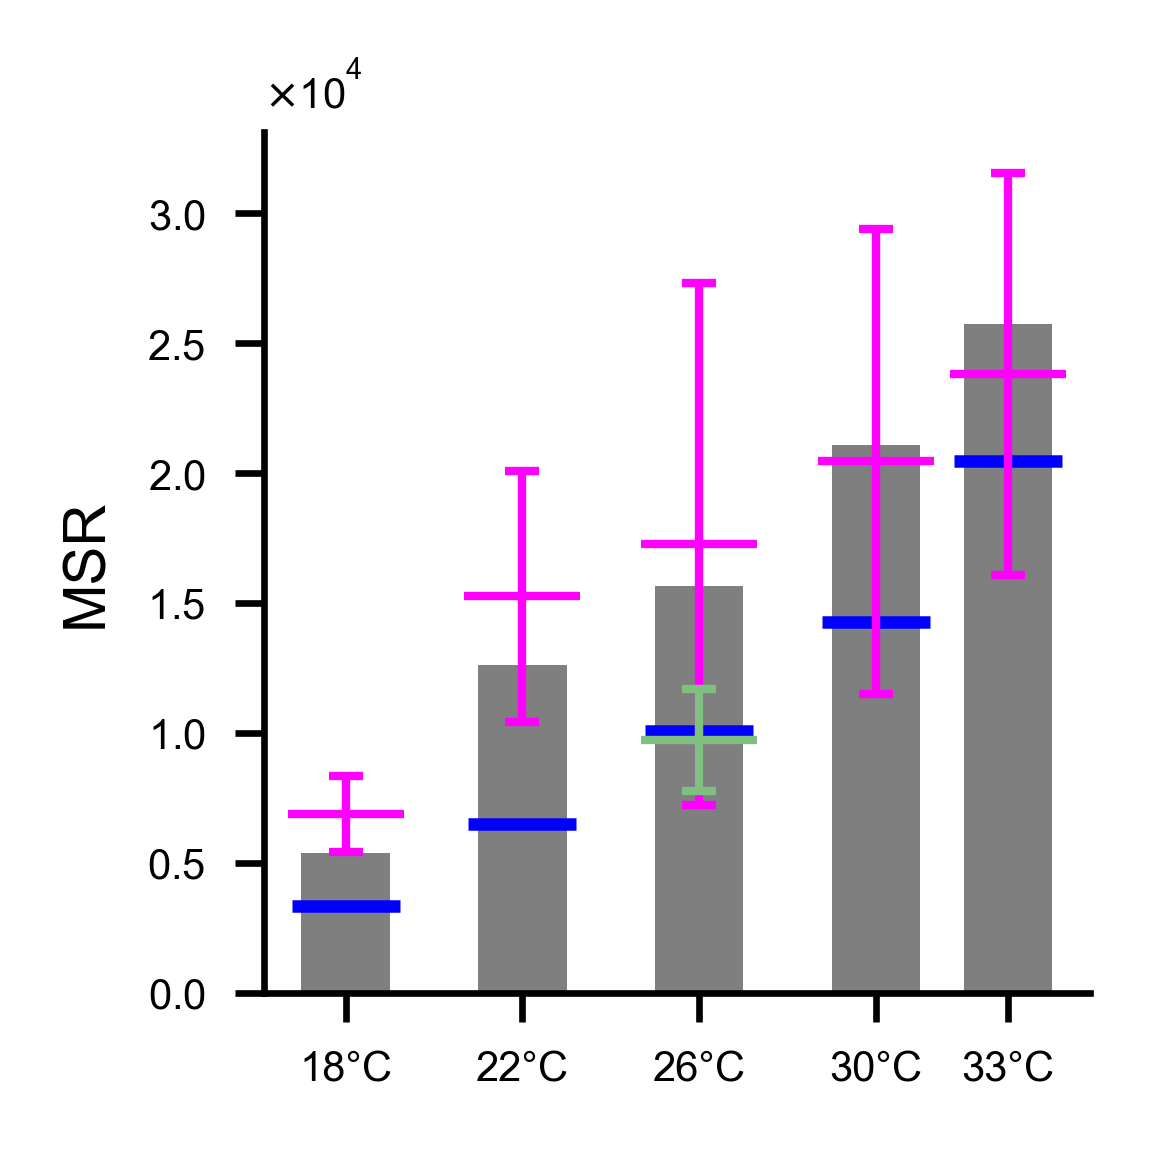

In [25]:
fig_bars, ax = plt.subplots(figsize=(1.8,1.8))

ax.bar(TEMPS, MSR_data[:,q], width=2, alpha=0.5)
ax.scatter(TEMPS, MSR_shuffled[:,q], marker="_", s=170, color="blue")
ax.errorbar(
    TEMPS, MSR_Ngen_mean, 
    yerr=MSR_Ngen_std, 
    fmt="_", markersize=14, 
    elinewidth=1, capsize=2,
    color="magenta"
)
ax.errorbar(
    26, MSR_long_mean, 
    yerr=MSR_long_std,
    fmt="_", markersize=14, 
    elinewidth=1, capsize=2,
    color="#7fbf7f"
)

ax.set_xticks(TEMPS, [f"{temp}°C" for temp in TEMPS])
ax.set_ylabel("MSR")

#ax.set_ylim(fig_lines.axes[0].get_ylim())
#ax.set_yticks(fig_lines.axes[0].get_yticks());

#fig_bars.savefig("panels/Fig6/MSR_bars.svg")

## Standardized MSR

### Compute the standardized MSR

In [26]:
A0_data = np.empty((len(TEMPS), len(qs))) # ( temp , q)
for t, temp in enumerate(TEMPS):
    DTHETAS = load_sequences(bDATAPATH, temp) # behavior data
    A0_data[t, :] = np.var(np.concatenate(DTHETAS))
sMSR_data = MSR_data / A0_data

In [27]:
A0_shuffled = np.empty((len(TEMPS), len(qs))) # ( temp , q)
for t, temp in enumerate(TEMPS):
    DTHETAS = load_sequences(bDATAPATH, temp) # behavior data
    DTHETAS_rand = randomize_sequences(DTHETAS) # shuffled data
    A0_shuffled[t,:] = np.var(np.concatenate(DTHETAS_rand))
sMSR_shuffled = MSR_shuffled / A0_shuffled

In [28]:
A0_long = np.empty((18, len(qs)))
for fish in range(18):
    ldtheta = loadlong_sequences(blDATAPATH, fish)
    A0_long[fish, :] = np.var(np.concatenate(ldtheta))
sMSR_long = MSR_long/A0_long

In [ ]:
A0_Ngen = [] # (temp) x (fish) x q
for t, temp in enumerate(TEMPS):
    A0_temp = [] # N-HMM generated
    for artr in ALL_ARTRs[ALL_ARTRs[:,1] == temp]:
        ndtheta = load_genneuro(nGENPATH, *artr)[0]
        A0_temp.append(np.var(np.concatenate(ndtheta)))
    A0_Ngen.append(A0_temp)

In [214]:
sMSR_Ngen = [ [MSR_Ngen[t][f]/A0_Ngen[t][f] for f in range(len(MSR_Ngen[t]))] for t in range(len(MSR_Ngen))]

### sMSR line plot

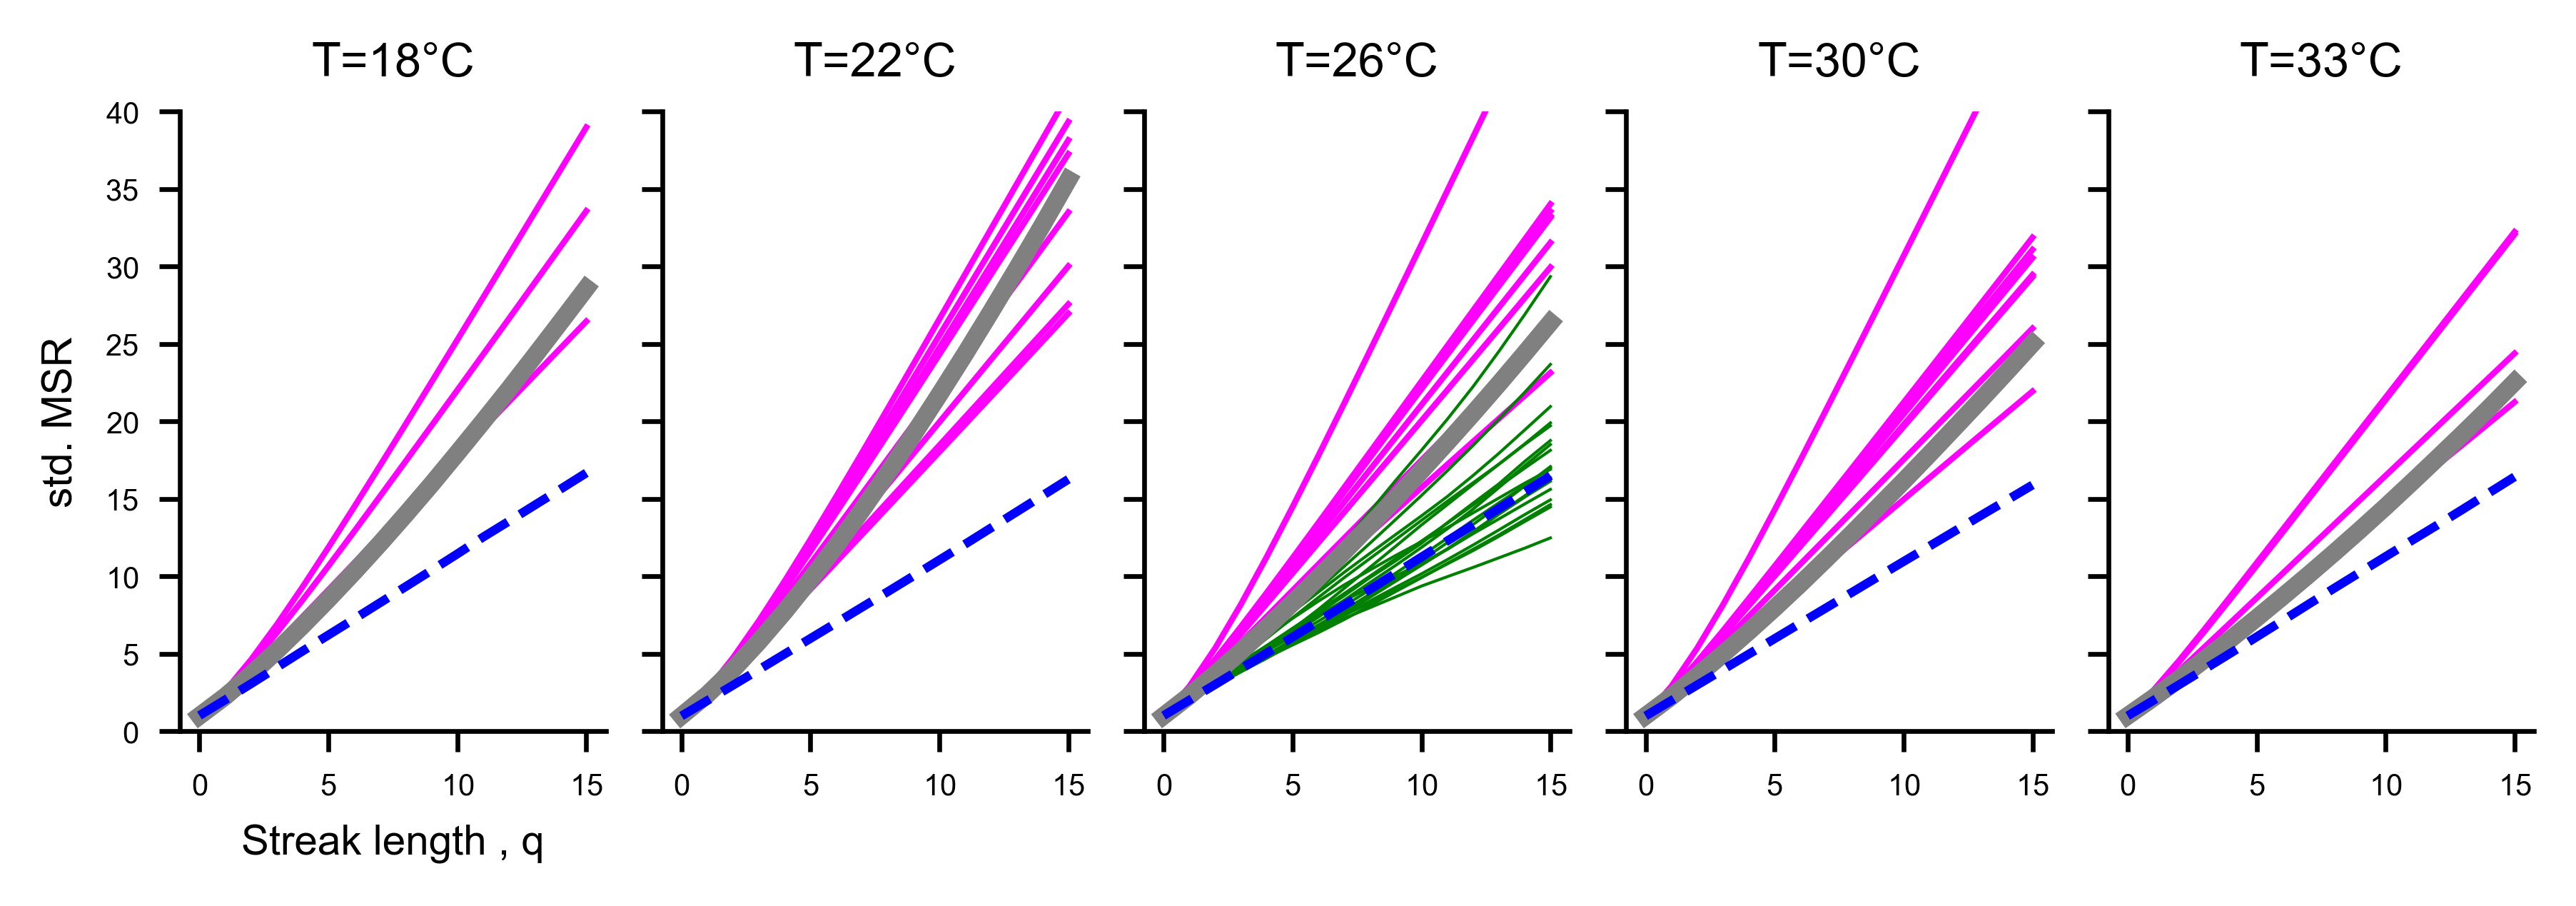

In [303]:
sfig_lines, axs = plt.subplots(
    ncols=len(TEMPS), 
    figsize=(len(TEMPS)*1.18, 2), 
    sharex=True, sharey=True,
)

for t, temp in enumerate(TEMPS):
    ax =axs[t]
    ax.set_title(f"T={temp}°C")
    
    # long trajectories
    if temp == 26:
        for f in range(18):
            ax.plot(qs, sMSR_long[f], color="green", linewidth=0.5)

    # data
    ax.plot(qs, sMSR_data[t], color="grey", linewidth=3)

    # shuffled
    ax.plot(qs, sMSR_shuffled[t], color="blue", linestyle="--")

    # neuro
    for f in range(len(sMSR_Ngen[t])):
        ax.plot(qs, sMSR_Ngen[t][f], color="magenta", zorder=0, linewidth=1)


ax = axs[0]
ax.set_ylim(0, 40)
ax.set_xticks([0,5,10,15])
ax.set_xlabel("Streak length , q")
ax.set_ylabel("std. MSR")
#ax.set_yticks(np.array([0,1,2,3,4])*1.e4);

#sfig_lines.savefig("panels/Fig6/sMSR_lines.svg")

### MSR bar plot

In [229]:
q = 10

In [230]:
sMSR_Ngen_mean = [np.mean([a[q] for a in sMSR_Ngen[t]]) for t in range(len(TEMPS))]
sMSR_Ngen_std = [np.std([a[q] for a in sMSR_Ngen[t]]) for t in range(len(TEMPS))]

In [231]:
sMSR_long_mean = np.mean(sMSR_long[:,q])
sMSR_long_std = np.std(sMSR_long[:,q])

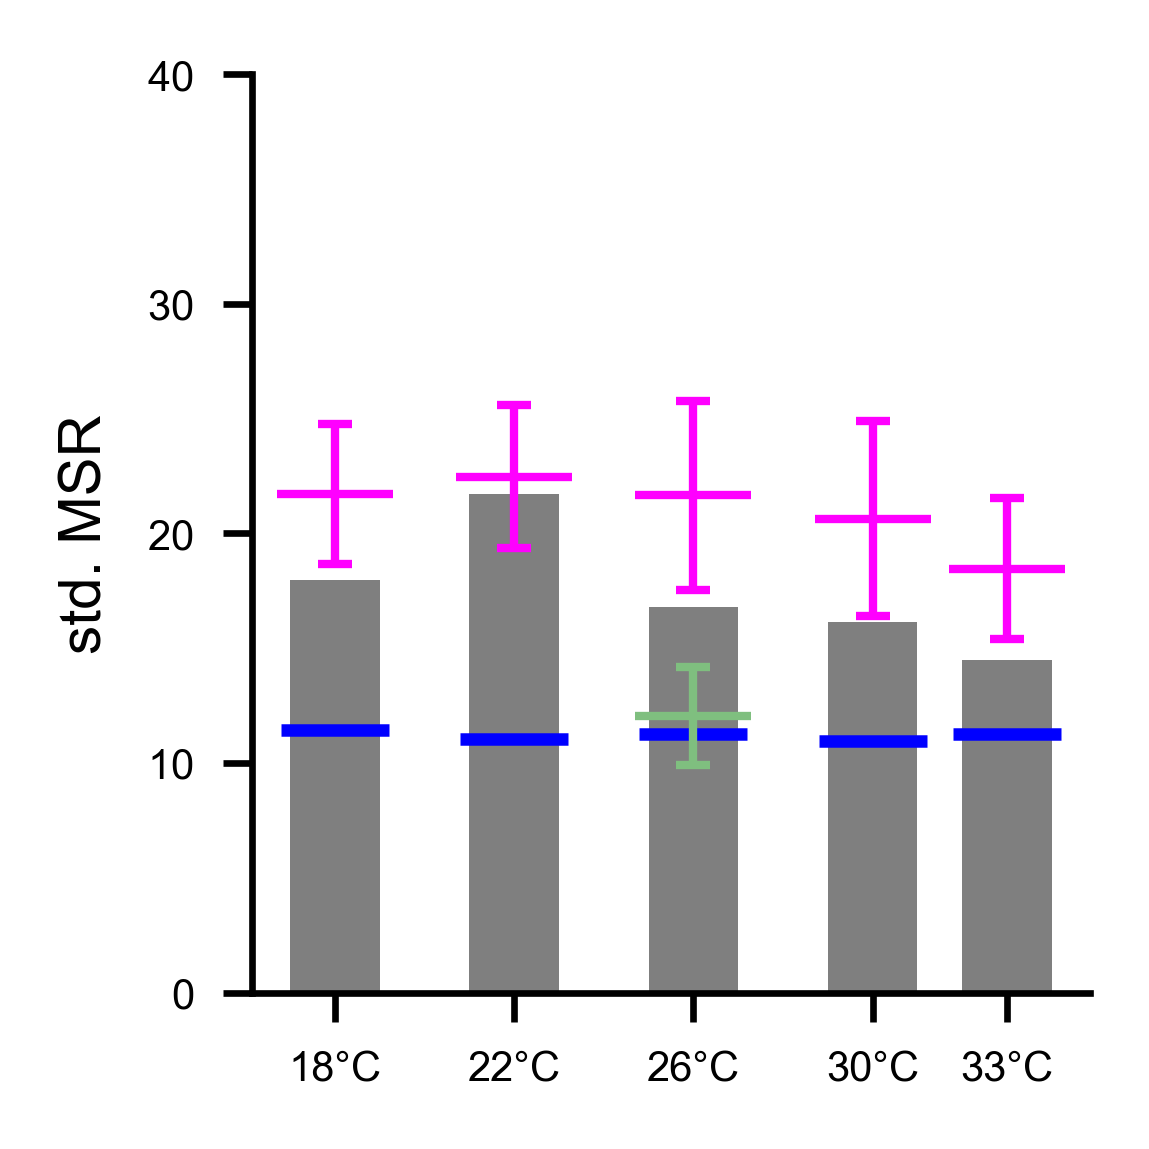

In [239]:
sfig_bars, ax = plt.subplots(figsize=(1.8,1.8))

ax.bar(TEMPS, sMSR_data[:,q], width=2, alpha=0.5)
ax.scatter(TEMPS, sMSR_shuffled[:,q], marker="_", s=170, color="blue")
ax.errorbar(
    TEMPS, sMSR_Ngen_mean, 
    yerr=sMSR_Ngen_std, 
    fmt="_", markersize=14, 
    elinewidth=1, capsize=2,
    color="magenta"
)
ax.errorbar(
    26, sMSR_long_mean, 
    yerr=sMSR_long_std,
    fmt="_", markersize=14, 
    elinewidth=1, capsize=2,
    color="#7fbf7f"
)

ax.set_xticks(TEMPS, [f"{temp}°C" for temp in TEMPS])
ax.set_ylabel("std. MSR")

ax.set_ylim(sfig_lines.axes[0].get_ylim())
ax.set_yticks(sfig_lines.axes[0].get_yticks());

#sfig_bars.savefig("panels/Fig6/sMSR_bars.svg")

## Trajectories

In [30]:
def reconstruct_trajs(dthets, dists):
    """Reconstruct (x,y) trajectory from a sequencere-orientation angles.
    
    Parameters :
    ------------
    dthets : 1d array
        sequence of re-orientation angles
    dists : 1d array
        sequence of bout distance

    Return :
    --------
    x : 1d array
        reconstructed x positions
    y : 1d array
        reconstructed y positions
    """
    angles = np.cumsum(-np.deg2rad(dthets))
    dxy =  dists[:,np.newaxis] * np.c_[np.cos(angles), np.sin(angles)]
    x,y = tuple(np.cumsum(dxy, axis=0).T)
    return x, y

In [32]:
temp = 26

# B
bangle, bdt, bdist, bstates = load_genbehavior(bGENPATH, temp)
bx, by = reconstruct_trajs(bangle, bdist)

# N
nangle, ndt, ndist, nstates = load_genneuro(nGENPATH, 14, 26)
nangle, ndt, ndist, nstates = nangle[0], ndt[0], ndist[0], nstates[0]
nx, ny = reconstruct_trajs(nangle, ndist)

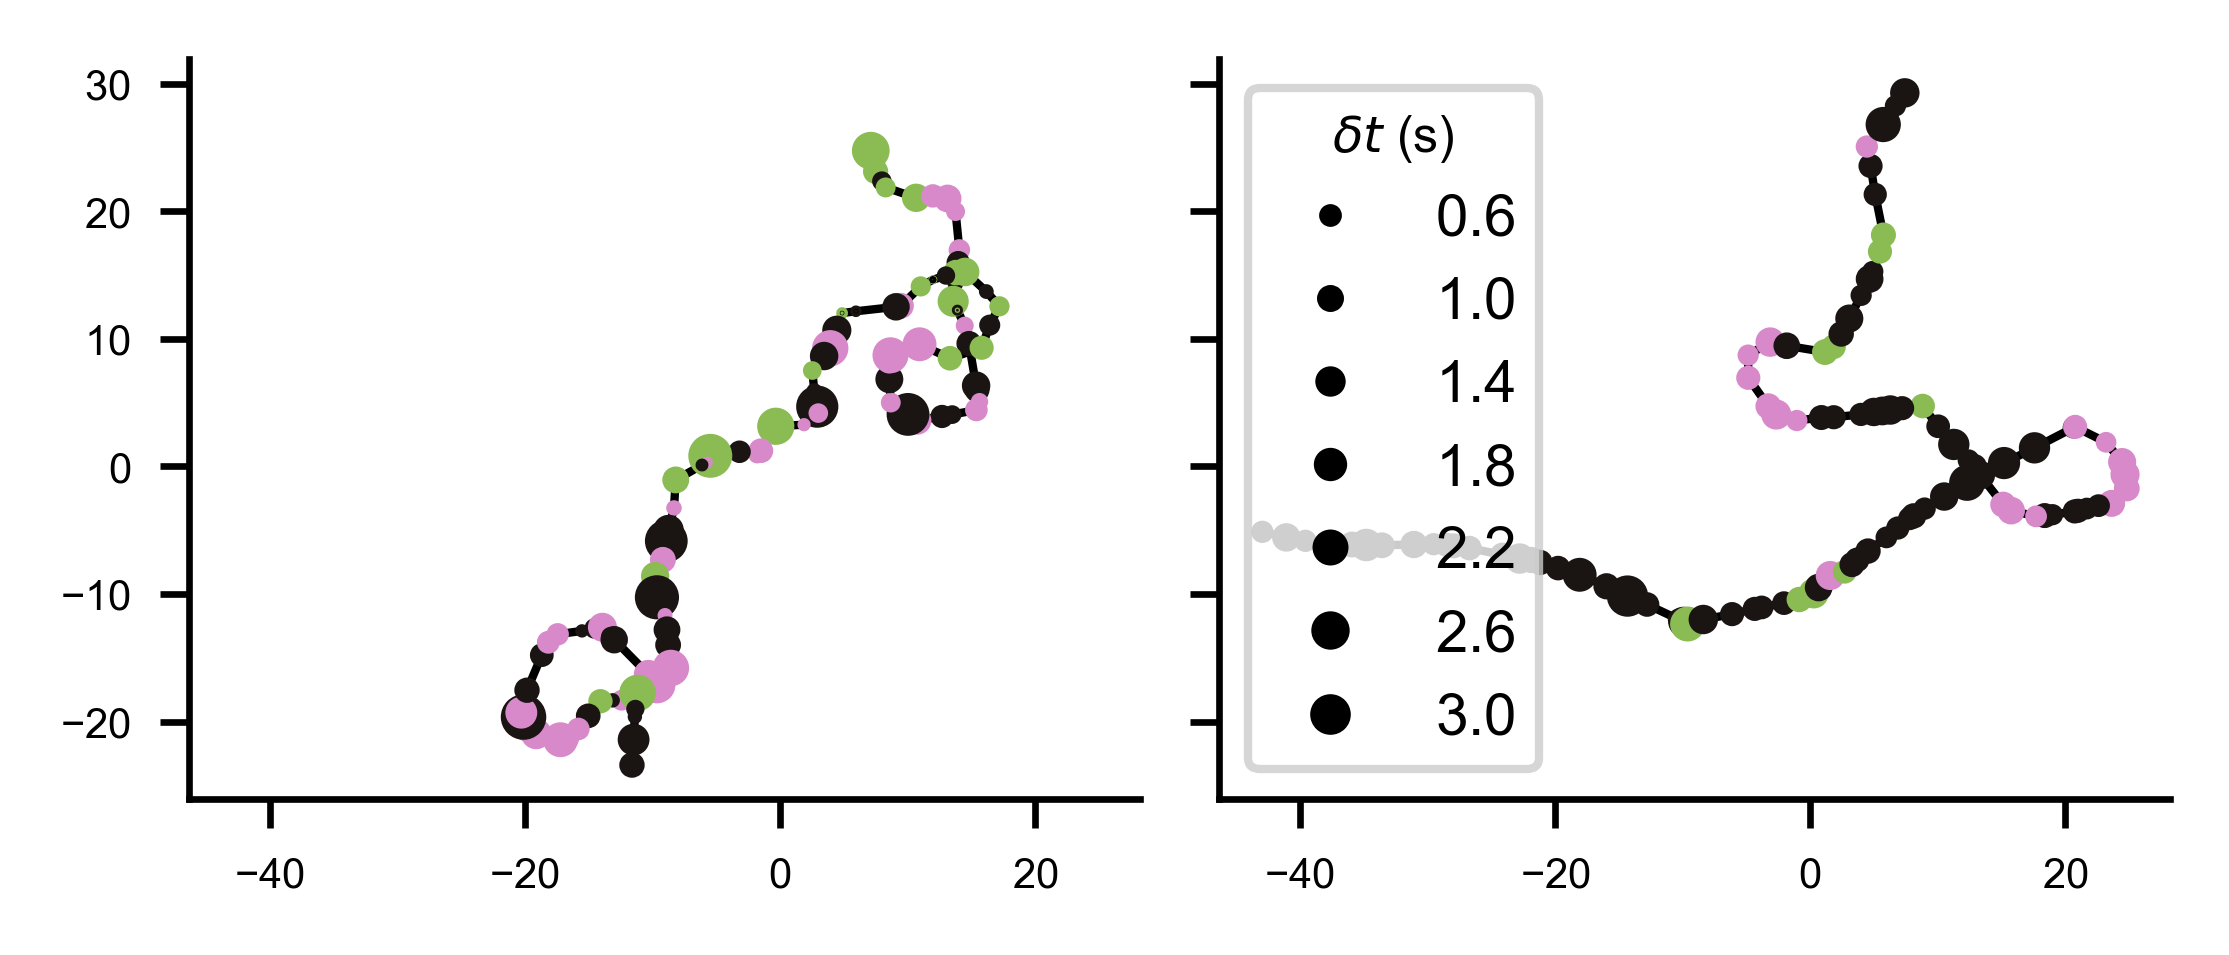

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(2*1.8, 1.8), sharex=True, sharey=True)
for ax in axs:
    ax.set_aspect(1)

ax = axs[0] # BfromB
n1,n2 = 100,200
xx, yy = bx[n1:n2]-np.mean(bx[n1:n2]),by[n1:n2]-np.mean(by[n1:n2])
dt = bdt[n1:n2]*5
s = np.insert(bstates[n1+1:n2], -1,0)
ax.plot(xx, yy, zorder=0, linewidth=1)
scat = ax.scatter(xx, yy, s=dt, c=FLR_colors[s], zorder=1)

ax = axs[1] # BfromN
n1,n2 = 200, 300
xx, yy = nx[n1:n2]-np.mean(nx[n1:n2]),ny[n1:n2]-np.mean(ny[n1:n2])
dt = ndt[n1:n2]*5
s = np.insert(nstates[n1+1:n2], -1,0)
ax.plot(xx, yy, zorder=0, linewidth=1)
scat = ax.scatter(xx, yy, s=dt, c=FLR_colors[s], zorder=1)

handles, labels = scat.legend_elements(prop="sizes")
hands, labs = [], []
for h,l in zip(handles[::2], labels[::2]):
    size = int(l.split("{")[-1].split("}")[0])/5
    lab = r"$\mathdefault{"+str(size)+"}$"
    hands.append(h)
    labs.append(lab)
legnd = plt.legend(hands, labs, title=r"$\delta t$ (s)")

#fig.savefig("panels/Fig6/trajs.svg")

# Supplementary

## Distributions

In [5]:
i = 3
artr = ALL_ARTRs[i]
print(artr)

temp = artr[1]
ANGLEs, DTs, DISTs = load_behavior(bDATAPATH, temp)
bangle, bdt, bdist, bstate = load_genbehavior(bGENPATH, temp)
nangle, ndt, ndist, nstate = load_genneuro(nGENPATH, *artr)

[11 22]


In [6]:
def hist(X, bins=None):
    h_x, b_x = np.histogram(X, bins=bins, density=True)
    #print(h_x.sum())
    h_x[h_x==0] = np.nan
    return h_x, (b_x[1:] + b_x[:-1])/2

nbins = 75

h_ANGLES, b_ANGLES = hist(np.concatenate(ANGLEs), bins=np.linspace(-100, +100, 10*nbins))
h_bangles, b_bangles = hist(bangle, bins=np.linspace(-100, +100, nbins))
h_nangles, b_nangles = hist(np.concatenate(nangle), bins=np.linspace(-100, +100, nbins))

h_DT, b_DT = hist(np.concatenate(DTs), bins=np.linspace(0, 20, 10*nbins))
h_bdt, b_bdt = hist(bdt, bins=np.linspace(0, 20, nbins))
h_ndt, b_ndt = hist(np.concatenate(ndt), bins=np.linspace(0, 20, nbins))

h_DIST, b_DIST = hist(np.concatenate(DISTs), bins=np.linspace(0, 10, 10*nbins))
h_bdist, b_bdist = hist(bdist, bins=np.linspace(0, 10, nbins))
h_ndist, b_ndist = hist(np.concatenate(ndist), bins=np.linspace(0, 10, nbins))

(0.0002, 6.0)

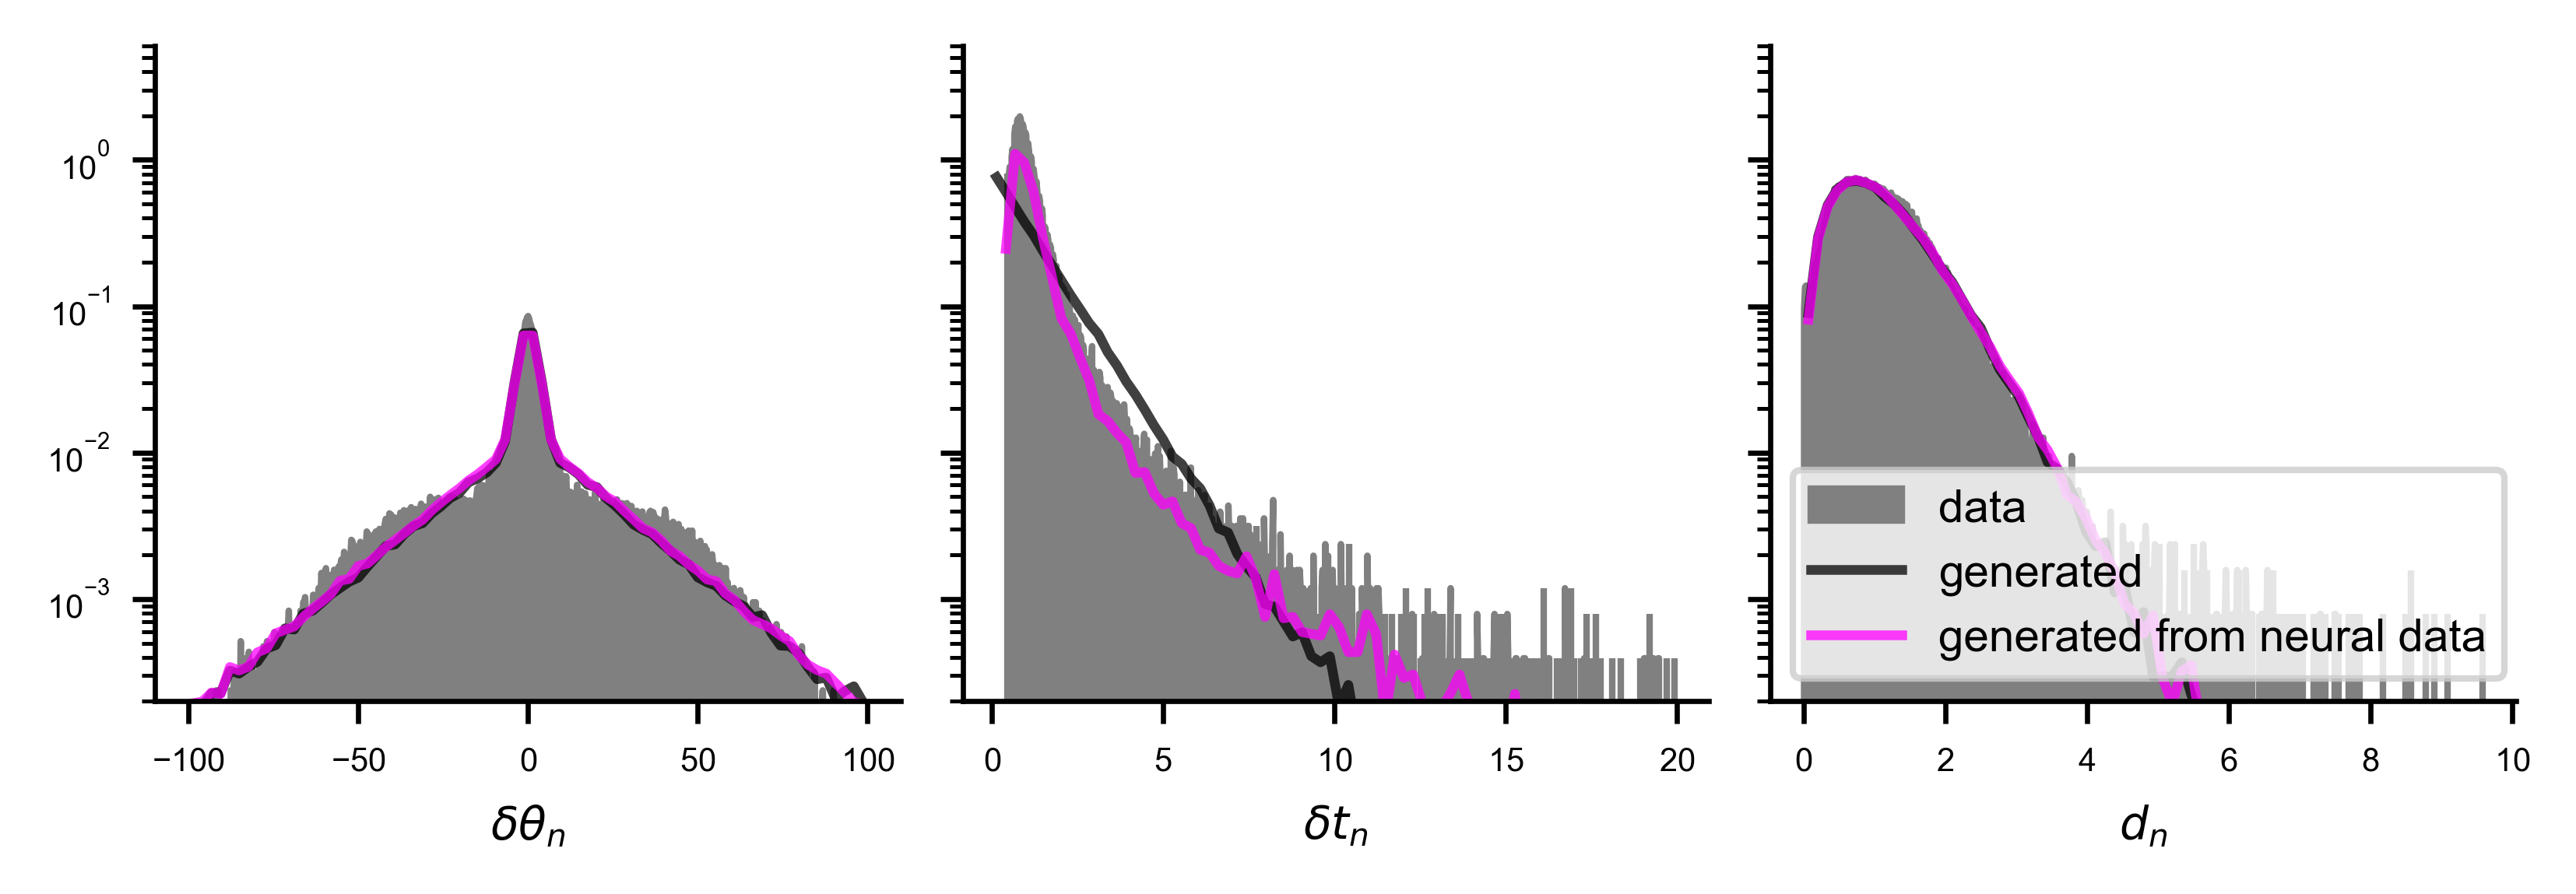

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(3*1.8,1.8), sharey=True)
for ax in axs:
    ax.set_yscale("log")
#ax.set_ylim(1.e-4, 10.e0)

data_color = "grey"
bgen_color = "k"
ngen_color = "magenta"
gen_alpha = 0.75
border = 1
norder = 2
ORDER = 0

ax = axs[0]
ax.fill_between(b_ANGLES, h_ANGLES, zorder=ORDER, color=data_color)
ax.plot(b_bangles, h_bangles, color=bgen_color, alpha=gen_alpha, zorder=border)
ax.plot(b_nangles, h_nangles, color=ngen_color, alpha=gen_alpha, zorder=norder)
ax.set_xlabel(r"$\delta\theta_n$")
#ax.set_ylabel("Density")

ax = axs[1]
ax.fill_between(b_DT, h_DT, zorder=ORDER, color=data_color)
ax.plot(b_bdt, h_bdt, color=bgen_color, alpha=gen_alpha, zorder=border)
ax.plot(b_ndt, h_ndt, color=ngen_color, alpha=gen_alpha, zorder=norder)
ax.set_xlabel(r"$\delta t_n$")

ax = axs[2]
ax.fill_between(b_DIST, h_DIST, zorder=ORDER, color=data_color, label="data")
ax.plot(b_bdist, h_bdist, color=bgen_color, alpha=gen_alpha, label="generated", zorder=border)
ax.plot(b_ndist, h_ndist, color=ngen_color, alpha=gen_alpha, label="generated from neural data", zorder=norder)
ax.set_xlabel(r"$d_n$")

ax.legend()
ax.set_ylim(2.e-4, 6.e0)


#fig.savefig("panels/Fig6/BfromB_and_BfromN_hists.svg")

## Behavior Generated Trajectory

In [78]:
x, y = reconstruct_trajs(bangle, bdist)

truncated at 5.996111422581752 min


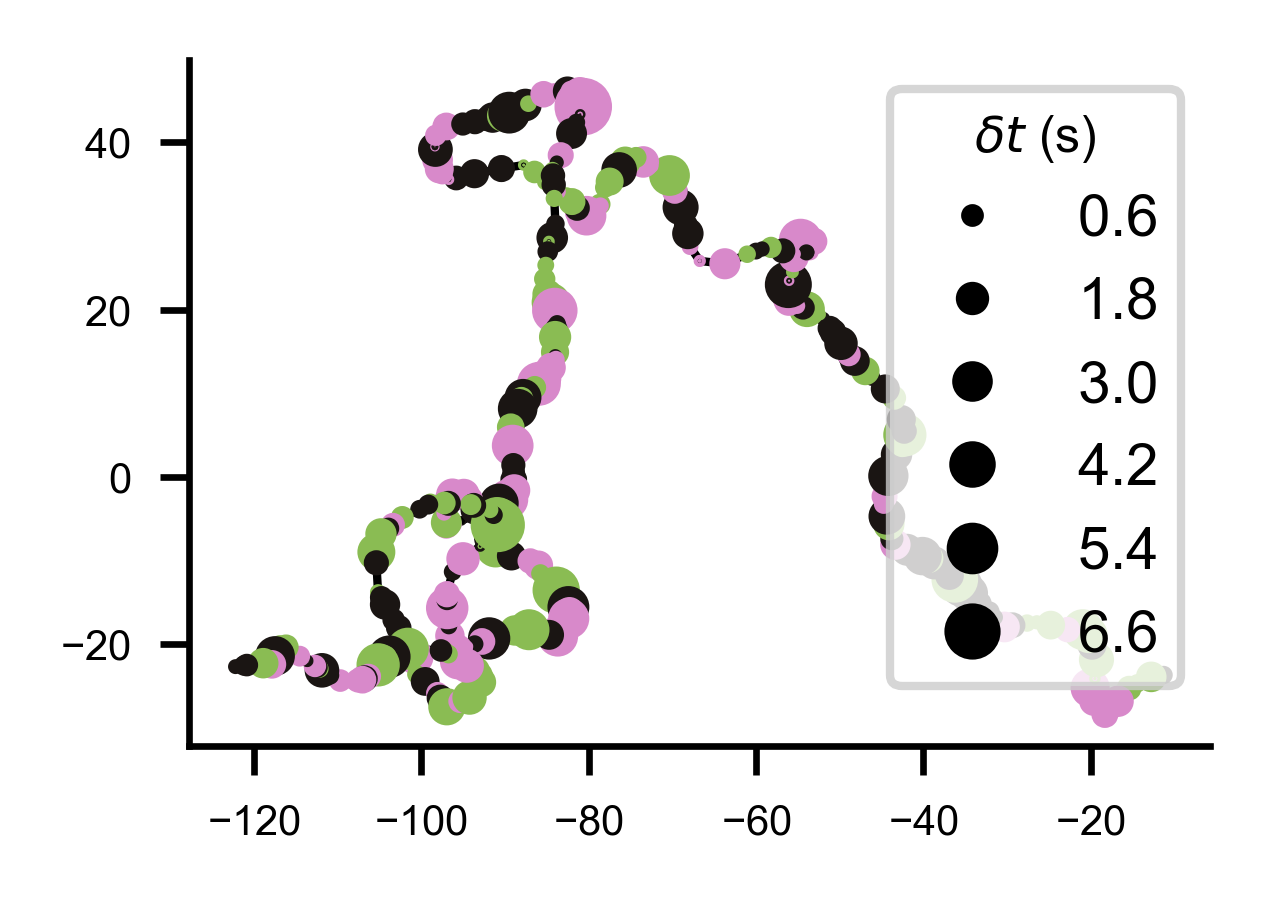

In [90]:
n1,n2 = 500,850
fig, ax = plt.subplots()
ax.plot(x[n1:n2],y[n1:n2], zorder=0, linewidth=1)
scat = ax.scatter(x[n1:n2],y[n1:n2], s=bdt[n1:n2]*5, c=FLR_colors[np.insert(bstate[n1+1:n2], -1,0)], zorder=1)
print(f"truncated at {np.sum(bdt[n1:n2])/60} min")
ax.set_aspect(1)
handles, labels = scat.legend_elements(prop="sizes")
hands, labs = [], []
for h,l in zip(handles[::2], labels[::2]):
    size = int(l.split("{")[-1].split("}")[0])/5
    lab = r"$\mathdefault{"+str(size)+"}$"
    hands.append(h)
    labs.append(lab)
legnd = plt.legend(hands, labs, title=r"$\delta t$ (s)")

fig.savefig("panels/Fig6/BfromB_traj.svg")

## Neuro Generated Trajectories

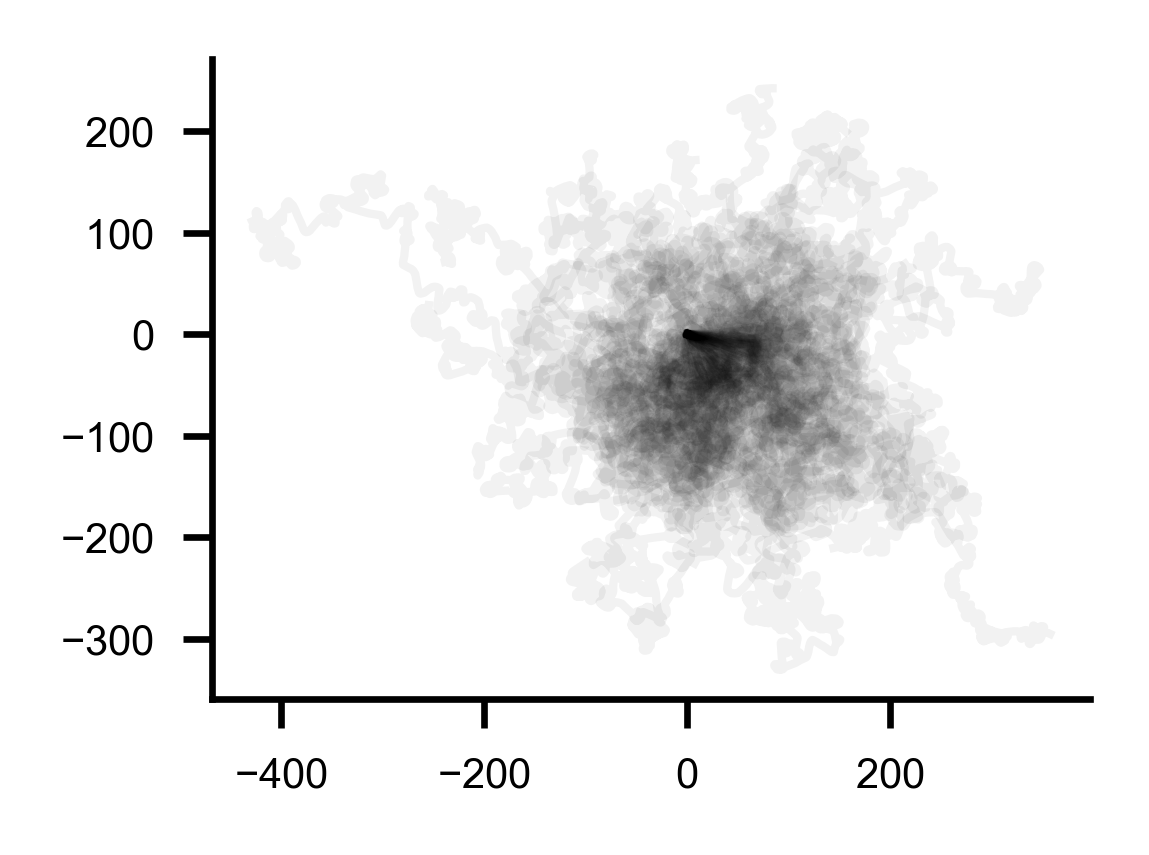

In [8]:
fig, ax = plt.subplots(figsize=(1.8,1.8))
ax.set_aspect(1)
for j in range(len(nangle)):
    x, y = reconstruct_trajs(nangle[j], ndist[j])
    dtt = ndt[j]
    statee = nstate[j]
    ax.plot(x,y, color="k", alpha=0.05, zorder=0, linewidth=1)
    #ax.scatter(x,y, s=dtt*5, c=FLR_colors[np.insert(statee[1:], -1,0)], zorder=1, alpha=0.1)

#fig.savefig("panels/Fig6/BfromN_trajs.svg")

### example trajectory

truncated at 5.305767666935231 min


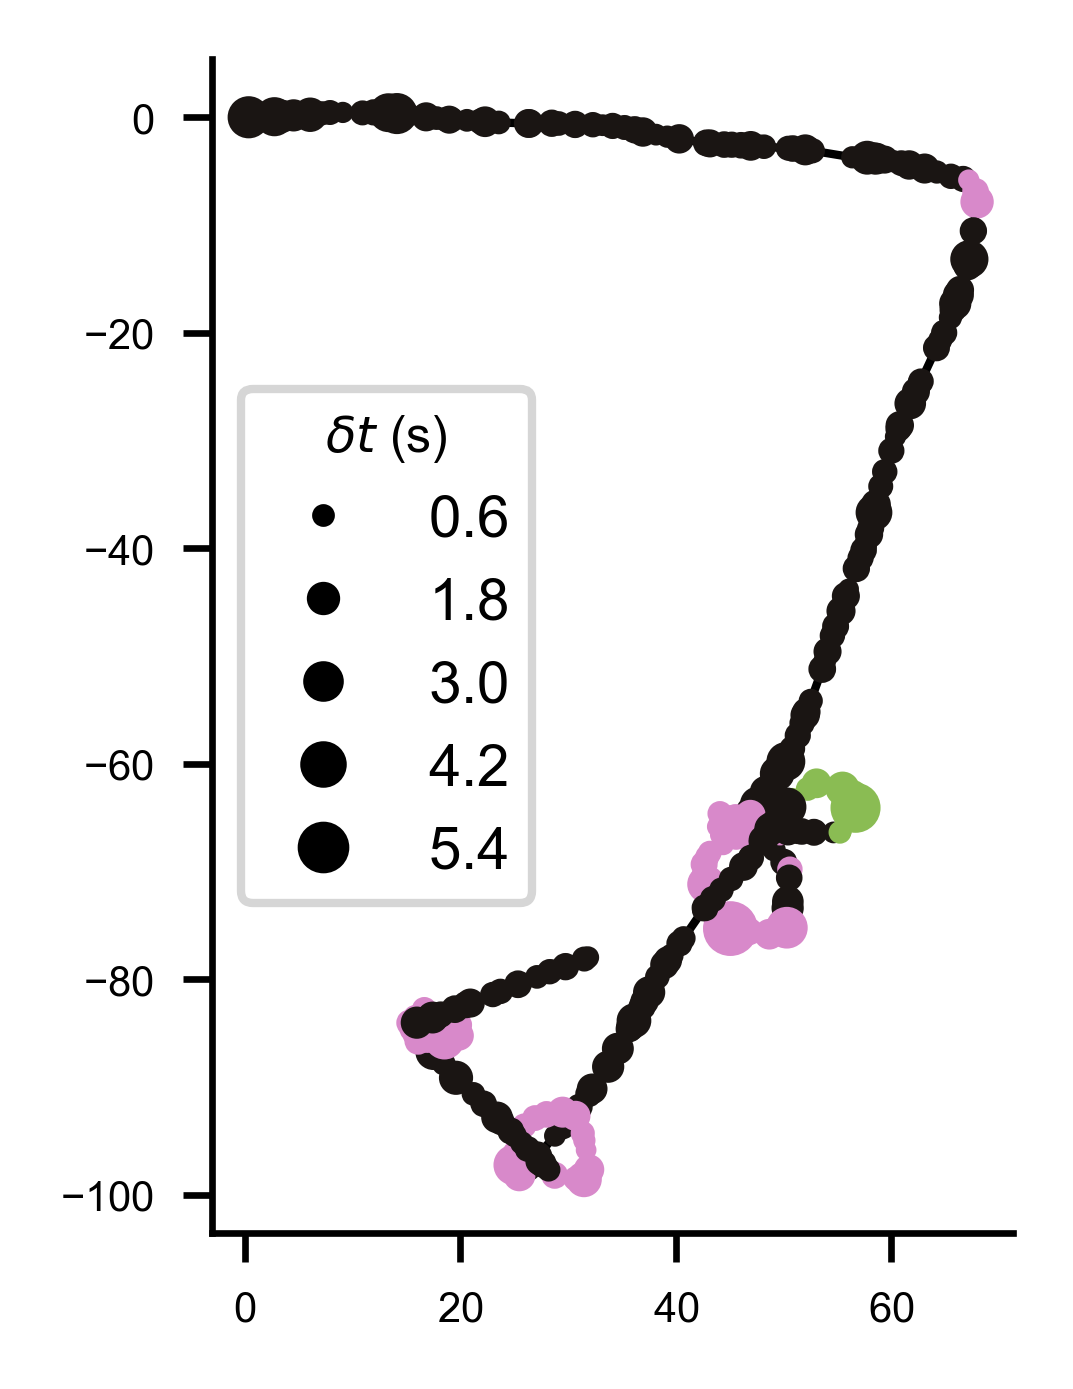

In [9]:
j = 3
end = 291
x, y = reconstruct_trajs(nangle[j], ndist[j])
dtt = ndt[j] ; print(f"truncated at {np.sum(dtt[:end])/60} min")
statee = nstate[j]
fig, ax = plt.subplots(figsize=(2.2,2.2))
ax.plot(x[:end],y[:end], zorder=0, linewidth=1)
scat = ax.scatter(x[:end],y[:end], s=dtt[:end]*5, c=FLR_colors[np.insert(statee[1:end], -1,0)], zorder=1)
ax.set_aspect(1)
handles, labels = scat.legend_elements(prop="sizes")
hands, labs = [], []
for h,l in zip(handles[::2], labels[::2]):
    size = int(l.split("{")[-1].split("}")[0])/5
    lab = r"$\mathdefault{"+str(size)+"}$"
    hands.append(h)
    labs.append(lab)
legnd = plt.legend(hands, labs, title=r"$\delta t$ (s)")
#fig.savefig("panels/Fig6/BfromN_traj.svg")

## Translated Neuro Activity

In [10]:
from matplotlib.gridspec import GridSpec
from scipy.cluster import hierarchy

In [11]:
mL, mR, L,R,dt = load_ARTR(nDATAPATH, *artr)

In [12]:
seq = load_ARTR_viterbi(nOUTPATH, *artr)

In [13]:
neuro_duration = dt*L.shape[0]#t[-1]
neuro_duration/60

20.000040506751123

In [14]:
def find_closest(x, Y):
    return np.argmin(np.abs(x - Y))

def find_closests(X, Y):
    return np.array([find_closest(x,Y) for x in X])

In [15]:
times = np.linspace(0, neuro_duration, 6000)

In [16]:
states = np.full((len(nstate),len(times)), -1)
for i in range(len(nstate)):
    #ts = find_closests(np.cumsum(ndt[i]) * (neuro_duration / genneuro_durations[i]), times)
    ts = find_closests(np.cumsum(ndt[i]) * 1/(0.44), times)
    ts = np.insert(ts, 0, 0)
    for j in range(0, len(ts)-1):
        states[i,ts[j]:ts[j+1]] = nstate[i][j]

In [17]:
X = np.corrcoef(states)
Z = hierarchy.ward(X)
order = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, X))

In [18]:
FLRN_colors = np.vstack([FLR_colors, np.array([1,1,1,1])])

(0.0, 100.0)

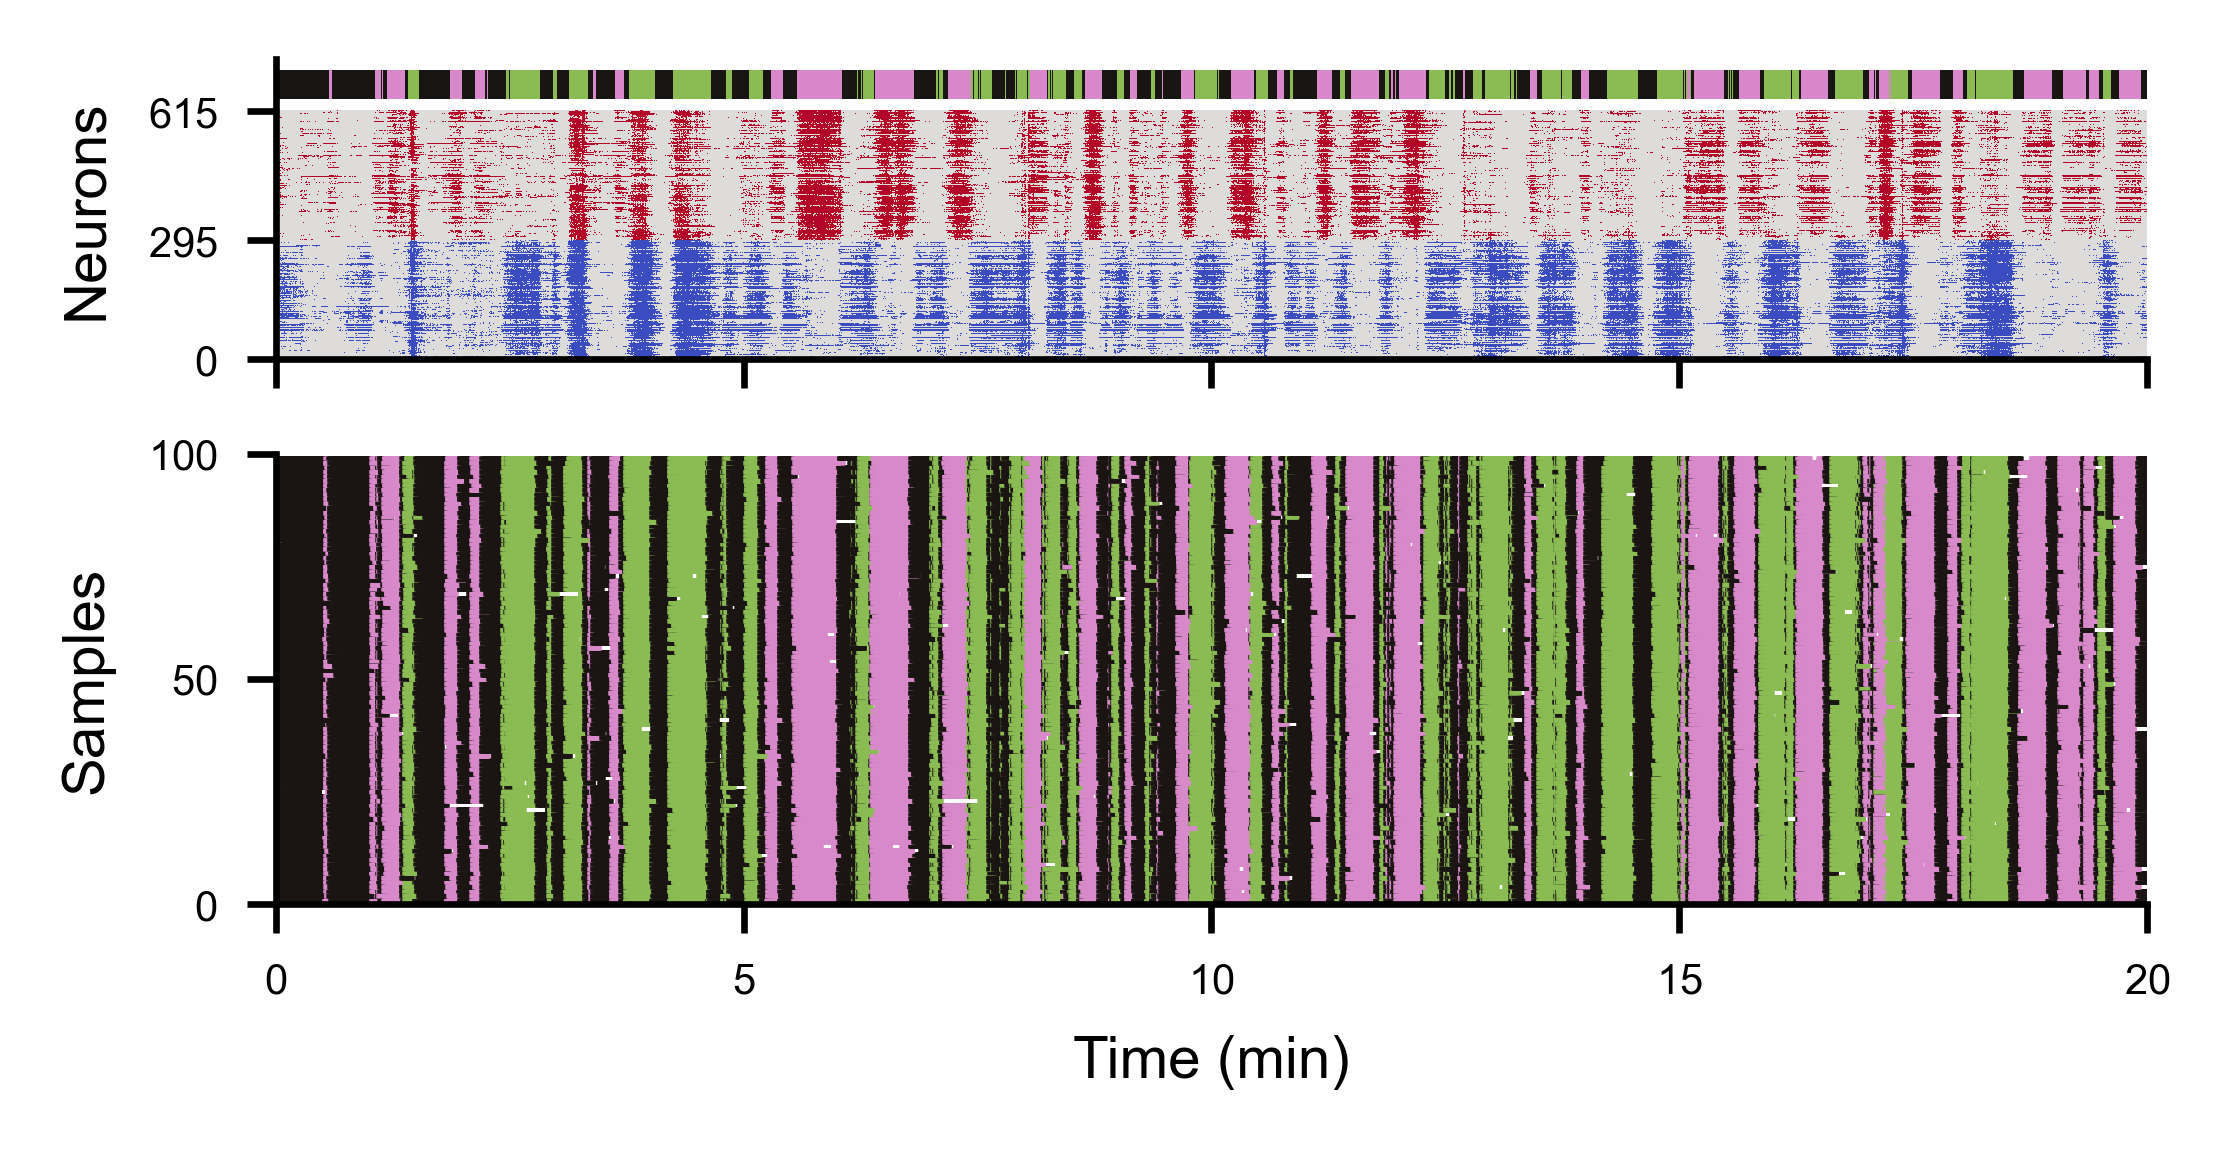

In [21]:
fig = plt.figure(figsize=(2*1.8,1.8))
gs = GridSpec(2,1,fig, height_ratios=[2/5, 3/5])

ax1 = plt.subplot(gs[0])
t = np.arange(0,len(mL)*dt, dt)
ypad = 30
yext = 100
ax1.imshow(
    np.c_[-L.astype(np.int_),R.astype(np.int_)].T, 
    cmap=ARTR_CMAP, vmin=-1, vmax=+1,
    extent=(0, t[-1]/60, 0, L.shape[1] + R.shape[1]),
    rasterized=True
)
ax1.imshow(
    FLR_colors[seq[np.newaxis,:]], 
    extent=(0,t[-1]/60, L.shape[1] + R.shape[1] + ypad,L.shape[1] + R.shape[1] + yext),
    rasterized=True
)
ax1.set_ylabel("Neurons")
ax1.set_ylim(0, L.shape[1] + R.shape[1] + ypad + yext)
ax1.set_xticklabels([])
ax1.set_xticks([0,5,10,15,20])
ax1.set_yticks([0,L.shape[1], L.shape[1] + R.shape[1]])

"""
ax2 = plt.subplot(gs[1])
ax2.imshow(FLRN_colors[states[order,:]], extent=(0, t[-1]/60, 0, len(nstate)),rasterized=True)
ax2.set_xlabel("Time (min)")
ax2.set_ylabel("Samples")
ax2.set_xlim(*ax1.get_xlim())
ax2.set_xticks([0,5,10,15,20])
ax2.set_yticks([0,50,100])
"""

ax2 = plt.subplot(gs[1])
for i in range(len(ndt)):
    #ax2.scatter(np.cumsum(ndt[i])/60/0.44,ndt[i]*0+i, marker="|", s=0.3, c=FLR_colors[nstate[i]], rasterized=True)
    ax2.scatter(np.cumsum(ndt[i])/60*0.44,ndt[i]*0+i, marker="|", s=0.3, c=FLR_colors[nstate[i]], rasterized=True)
ax2.set_xlabel("Time (min)")
ax2.set_ylabel("Samples")
ax2.set_xlim(*ax1.get_xlim())
ax2.set_xticks([0,5,10,15,20])
ax2.set_yticks([0,50,100])
ax2.set_ylim(0,len(ndt))

#fig.savefig("panels/Fig6/BfromN_samples.svg")

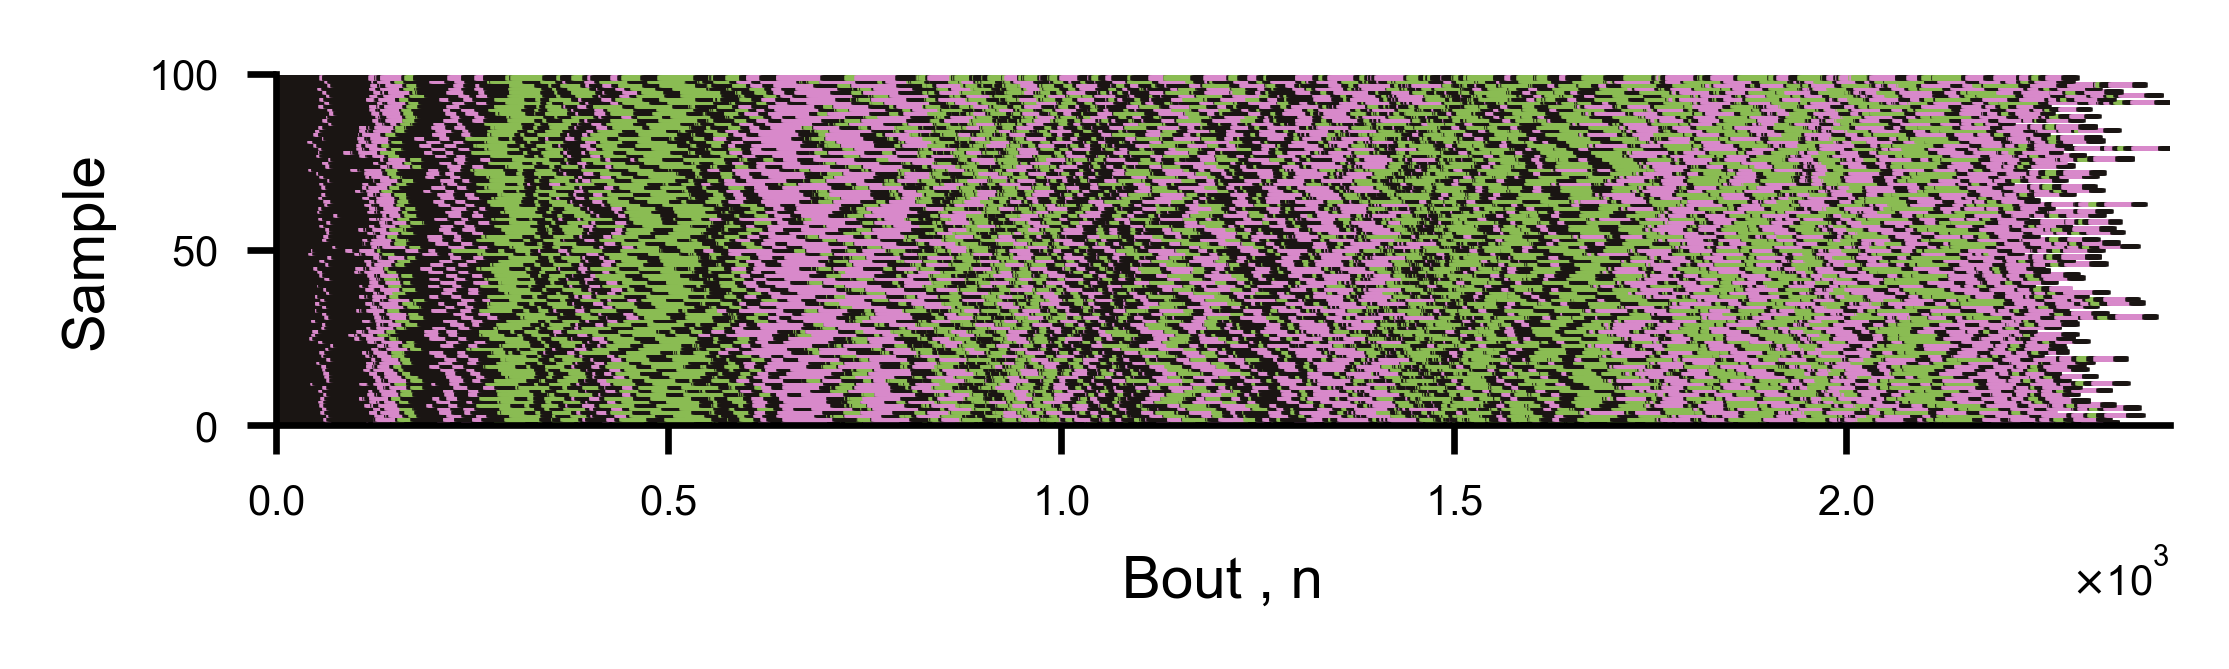

In [22]:
fig, ax = plt.subplots(figsize=(2*1.8,1))
for i in range(len(nstate)):
    ax.scatter(np.arange(len(nstate[i])),nstate[i]*0+i, marker="|", s=0.3, c=FLR_colors[nstate[i]], rasterized=True)
ax.set_xlabel("Bout , n")
ax.set_ylabel("Sample")
ax.set_xlim(0, np.max([len(a) for a in nstate]))
ax.set_ylim(0,len(nstate))
ax.set_yticks([0,50,100])

#fig.savefig("panels/Fig6/supps/BfromN_samples_perbout.svg")

## Diagram

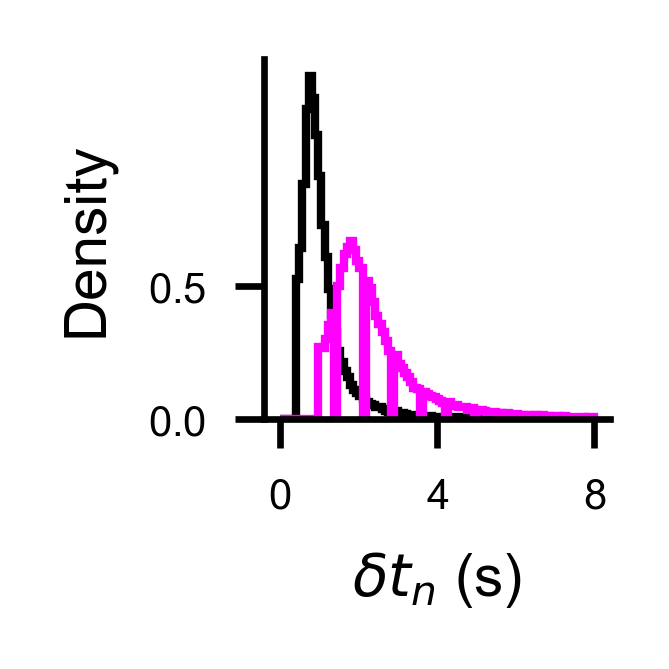

In [27]:
fig, ax = plt.subplots(figsize=(1,1))
bins = np.linspace(0, 8, 100)
ax.hist(np.concatenate(DTs), bins=bins, histtype="step", density=True, color="black");
ax.hist(np.concatenate(DTs)/0.44, bins=bins, histtype="step", density=True, color="magenta");
ax.set_xlabel(r"$\delta t_n$ (s)")
ax.set_ylabel("Density")
ax.set_xticks([0,4,8])
ax.set_yticks([0,0.5])
#fig.savefig("panels/Fig6/diag_DTdistrib.svg")

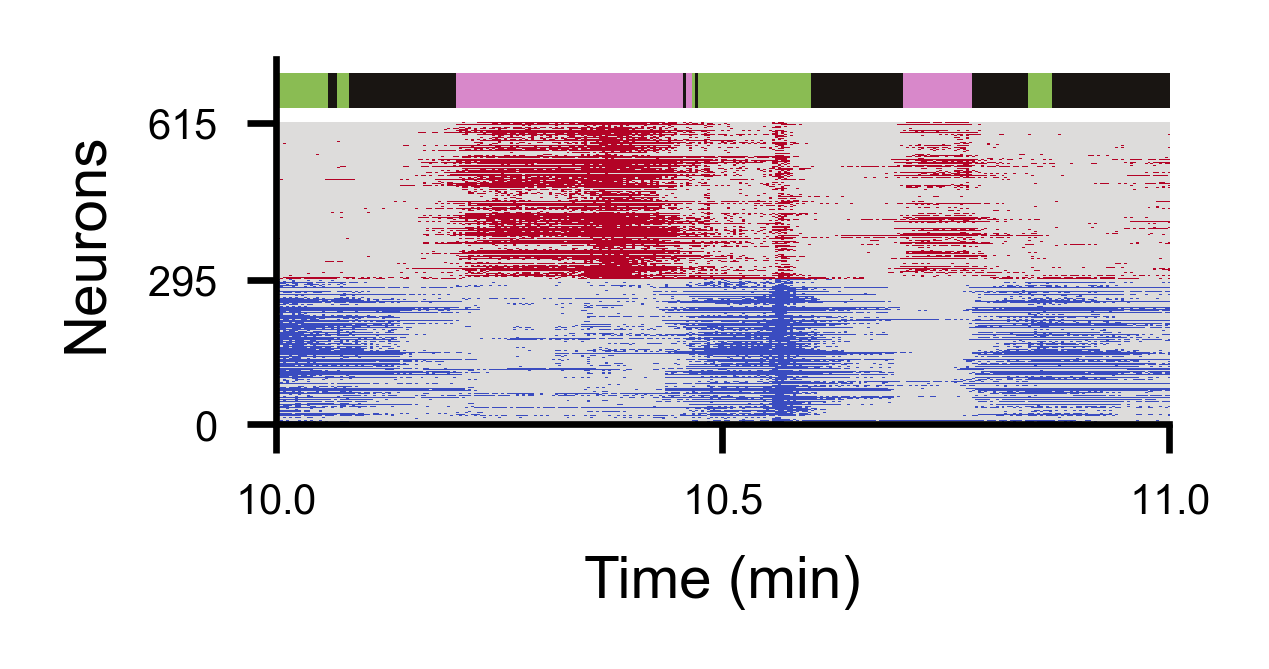

In [214]:
fig, ax = plt.subplots(nrows=1, figsize=(2,1), sharex=True)
t = np.arange(0,len(mL)*dt, dt)
ypad = 30
yext = 100
ax.imshow(
    np.c_[-L.astype(np.int_),R.astype(np.int_)].T, 
    cmap=ARTR_CMAP, vmin=-1, vmax=+1,
    extent=(0, t[-1]/60, 0, L.shape[1] + R.shape[1]),
    rasterized=True,
)
ax.imshow(
    FLR_colors[seq[np.newaxis,:]], 
    extent=(0,t[-1]/60, L.shape[1] + R.shape[1] + ypad,L.shape[1] + R.shape[1] + yext),
    rasterized=True
)
ax.set_ylim(0, L.shape[1] + R.shape[1] + ypad + yext)
ax.set_ylabel("Neurons")
ax.set_xlabel("Time (min)")

ax.set_xlim(10,11)
ax.set_xticks([10,10.5,11])
ax.set_yticks([0,L.shape[1], L.shape[1] + R.shape[1]])
#fig.savefig("panels/Fig6/diag_activity.svg")